Research Paper References:

[1. Genome-wide cell-free DNA fragmentation in patients with cancer](https://www.nature.com/articles/s41586-019-1272-6)

[2. Early cancer detection from genome-wide cell-free DNA fragmentation via shuffled frog leaping algorithm and support vector machine](https://academic.oup.com/bioinformatics/article/37/19/3099/6218770)

These articles mentioned about classifying between different types of cancer, but did not explore on the differentiation between different stages of cancer.



# **1. Setting up and Reading in Data**

Mount the dataset in Google Drive

In [102]:
#connecting to data stored in google drive
# comment this block when running locally
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import relevant packages

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# SMOTE and Random Undersampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler

# Performance Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict, train_test_split

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer
from functools import partial

# KNN
from sklearn.neighbors import KNeighborsClassifier

# Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz # visualise tree
import graphviz

# Random Forest
from sklearn.ensemble import RandomForestClassifier

# ANN
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report


Reading in `Test_Set.csv` and `Train_Set.csv` from `data` folder

In [104]:
# the initialised filepath MUST be a relative path to a folder named data that contains the csv file
# If running in Colab:
train_file_path = "./drive/MyDrive/IT1244_Project/data/Train_Set.csv"
test_file_path = "./drive/MyDrive/IT1244_Project/data/Test_Set.csv"

# If running locally: Uncomment the following lines and comment the lines 3-4
# train_file_path = "Train_Set.csv"
# test_file_path = "Test_Set.csv"

df = pd.read_csv(train_file_path)
df_test = pd.read_csv(test_file_path)

## 1.1 Understanding the data


In [105]:
# Shape of data
print(f"rows: {df.shape[0]}, columns: {df.shape[1]}")

rows: 2193, columns: 351


In [106]:
df.head()

,length_51,length_52,length_53,length_54,length_55,length_56,length_57,length_58,length_59,length_60,...,length_392,length_393,length_394,length_395,length_396,length_397,length_398,length_399,length_400,class_label
0,0.000152,0.000081,0.000087,0.000092,0.000099,0.000125,0.000122,0.000115,0.000151,0.000167,...,0.007396,0.007193,0.006973,0.006481,0.006139,0.005958,0.005578,0.005327,0.005142,healthy
1,0.006256,0.006413,0.006512,0.006469,0.006810,0.007070,0.007748,0.008088,0.008671,0.008835,...,0.017830,0.017033,0.016373,0.015371,0.014340,0.013975,0.013243,0.012725,0.012267,healthy
2,0.003783,0.003886,0.004063,0.004237,0.004481,0.004832,0.004960,0.005605,0.005919,0.006480,...,0.010957,0.010481,0.009782,0.009211,0.008800,0.008320,0.007869,0.007286,0.007020,healthy
3,0.004635,0.004471,0.004383,0.004829,0.004920,0.005056,0.005475,0.006158,0.007174,0.007697,...,0.010032,0.008933,0.008970,0.008546,0.008125,0.007587,0.007501,0.006931,0.006663,healthy
4,0.011315,0.010045,0.009795,0.009906,0.010630,0.011467,0.013024,0.014853,0.016874,0.017501,...,0.009118,0.008535,0.008233,0.007754,0.007584,0.006933,0.006530,0.006378,0.005842,healthy


> 2193 data points with 350 features (`DNA fragment length`) and 1 target feature (`class_label`)

In [107]:
# Statistical analysis
df.describe()

,length_51,length_52,length_53,length_54,length_55,length_56,length_57,length_58,length_59,length_60,...,length_391,length_392,length_393,length_394,length_395,length_396,length_397,length_398,length_399,length_400
count,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,...,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000
mean,0.006481,0.006008,0.005988,0.006060,0.006290,0.006771,0.007466,0.008759,0.010395,0.011411,...,0.012359,0.011886,0.011411,0.010904,0.010408,0.009958,0.009503,0.009131,0.008747,0.008415
std,0.006746,0.006086,0.006054,0.005993,0.006205,0.006739,0.007542,0.009192,0.011396,0.012763,...,0.008149,0.007805,0.007517,0.007135,0.006833,0.006561,0.006235,0.006017,0.005747,0.005516
min,0.000032,0.000030,0.000022,0.000027,0.000040,0.000038,0.000040,0.000051,0.000049,0.000087,...,0.002320,0.002242,0.002067,0.002086,0.001965,0.001843,0.001731,0.001698,0.001659,0.001567
25%,0.001378,0.001273,0.001326,0.001387,0.001523,0.001646,0.001867,0.002260,0.002737,0.003024,...,0.007085,0.006759,0.006528,0.006232,0.005922,0.005651,0.005429,0.005268,0.005047,0.004868
50%,0.005429,0.005047,0.005021,0.005203,0.005286,0.005657,0.006068,0.006904,0.007943,0.008646,...,0.010115,0.009691,0.009214,0.008894,0.008412,0.008024,0.007695,0.007378,0.007011,0.006708
75%,0.009495,0.008846,0.008716,0.008813,0.009160,0.009723,0.010538,0.012197,0.013973,0.014923,...,0.015154,0.014573,0.014064,0.013267,0.012660,0.012156,0.011621,0.011155,0.010666,0.010283
max,0.079471,0.069445,0.069445,0.067825,0.071855,0.078914,0.091267,0.113398,0.140649,0.157588,...,0.062695,0.061578,0.060024,0.058549,0.056764,0.055813,0.054001,0.052768,0.051798,0.049086


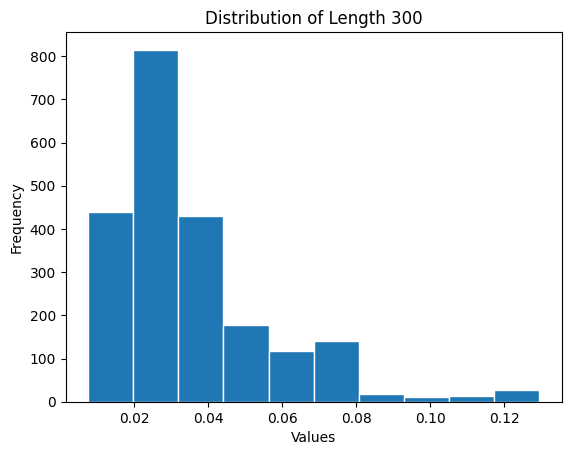

In [108]:
# Check distribution
for i in range(300,301):
    plt.hist(df.iloc[:, i], edgecolor = 'white')
    plt.title(f'Distribution of Length {i}')
    plt.xlabel("Values")
    plt.ylabel("Frequency")
    plt.show()

> The distribution of the DNA length is Poisson, where the count is **higher** at **lower values** (DNA fragment frequency) and it **decreases** with **higher values** (DNA fragment frequency)

> In fact, the all the lengths all display similar distribution. Thus, we can consider using log transformation to make the distribution more normal.

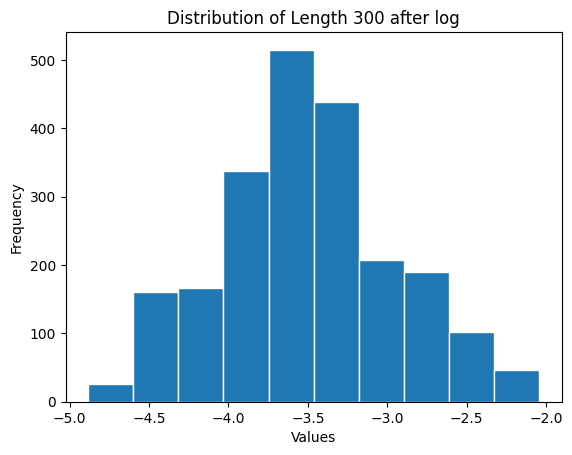

In [109]:
for i in range(300,301):
    plt.hist(np.log(df.iloc[:, i]), edgecolor = "white")
    plt.title(f'Distribution of Length {i} after log')
    plt.xlabel("Values")
    plt.ylabel("Frequency")
    plt.show()

> After performing log on the dataset, the distrbution is more normal.

## 1.2 Value Counts

Determine number of samples we have for each class.

In [110]:
# Examine the dataset
label_counts = df.iloc[:, -1].value_counts()
print("Label_counts:")
print(label_counts)

Label_counts:
class_label
early stage cancer        781
screening stage cancer    490
mid stage cancer          453
late stage cancer         409
healthy                    60
Name: count, dtype: int64


> This is a class imbalanced dataset, with more cancer than healthy observations.

> We can consider resampling and choosing metrics other than accuracy

# **2. Data Processing + Analysis**

## 2.1 Missing or Duplicate Data

In [111]:
# Check for missing values
df[df.isna().any(axis=1)]

# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

if duplicate_rows.empty:
    print("No duplicate rows found.")
else:
    print("Duplicate rows found:")
    print(duplicate_rows)

No duplicate rows found.


> There are no missing values and duplicate observations.

## 2.2 Extracting X and Y from the Dataframes
`df` = `x_df` and `y_df`

`df_test` = `x_test` and `y_test`

In [112]:
# Extracting x_train, x_test, y_train, y_test prior to cleaning
x_df = df.iloc[:, :-1]
y_df = df.iloc[:, -1]

x_test_df = df_test.iloc[:, :-1]
y_test_df = df_test.iloc[:, -1]

## 2.3 Data Pre-processing


### 2.3.1 Convert to numeric

In [113]:
# Convert all the y-values to numeric and store them as y_train_numeric and y_test_numeric
label = {
    'healthy':0, # 60
    'late stage cancer':1, # 409
    'screening stage cancer':2, # 490
    'early stage cancer':3, # 781
    'mid stage cancer':4 # 453
}

y_df_int = y_df.map(label)
y_test_df_int = y_test_df.map(label)

label_counts = y_df_int.value_counts()
print("Label_counts:")
print(label_counts)

Label_counts:
class_label
3    781
2    490
4    453
1    409
0     60
Name: count, dtype: int64


### 2.3.2 SMOTE and Random Undersampling

As our dataset is unbalanced, we have to increase the number of samples for minority sample, namely `class 0` (Healthy).

In [114]:
print('Before: ')
print(y_df_int.value_counts())

# Make a copy
x_df_before, y_df_int_before = x_df.copy(), y_df_int.copy()

# Combine SMOTE with Random Undersampling
over_strategy = {0:600, 1:781, 2:781, 3:781, 4:781}
under_strategy = {0:450, 1:700, 2:700, 3:700, 4:700}
over = SMOTE(sampling_strategy=over_strategy, random_state=42)
under = RandomUnderSampler(sampling_strategy=under_strategy, random_state=42)
steps = [('smote', over), ('random_under_sampler', under)]
pipeline = Pipeline(steps=steps)
x_df, y_df_int = pipeline.fit_resample(x_df, y_df_int)

print('')
print('After: ')
print(pd.DataFrame(y_df_int).value_counts())

Before: 
class_label
3    781
2    490
4    453
1    409
0     60
Name: count, dtype: int64

After: 
class_label
1              700
2              700
3              700
4              700
0              450
Name: count, dtype: int64


### 2.3.3 Feature Scaling
We use `MinMaxScaler` and `StandardScaler` to transform the data into normalized and standardized data for subsequent analysis.

In [115]:
# Normalize features

scaler = MinMaxScaler().set_output(transform="pandas")
x_df_norm = scaler.fit_transform(x_df)
x_test_df_norm = scaler.transform(x_test_df)

In [116]:
# Standardize features

scaler = StandardScaler().set_output(transform="pandas")
x_df_scaled = scaler.fit_transform(x_df)
x_test_df_scaled = scaler.transform(x_test_df)

In [117]:
# Standardize features with log

scaler = StandardScaler().set_output(transform="pandas")
x_df_log = np.log(x_df)
x_df_scaled_log = scaler.fit_transform(x_df_log)
x_test_df_log = scaler.transform(np.log(x_test_df))

## 2.4 Data Visualization

We took the 1st sample from each class and plot their max normalized frequency across all 350 columns. E.g, Feature 0 represents `length_51`.

### 2.4.1 Visualization on Raw Data

[]

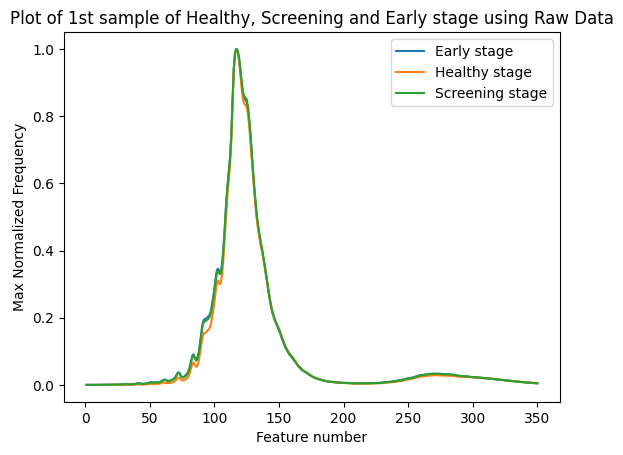

In [118]:
# Raw Data Visualisation
feature_columns = df.columns.tolist()

new_column_names = {old_col: i+1 for i, old_col in enumerate(df.columns[:350])}
df.rename(columns = new_column_names, inplace = True)
filtered_df = df.groupby('class_label').first()

plt.plot(filtered_df.iloc[0], label = "Early stage")
plt.plot(filtered_df.iloc[1], label = "Healthy stage")
plt.plot(filtered_df.iloc[4], label = "Screening stage")
plt.legend()
plt.title("Plot of 1st sample of Healthy, Screening and Early stage using Raw Data")
plt.xlabel("Feature number")
plt.ylabel("Max Normalized Frequency")
plt.plot()

### 2.4.2 Visualization on Normalized Data

[]

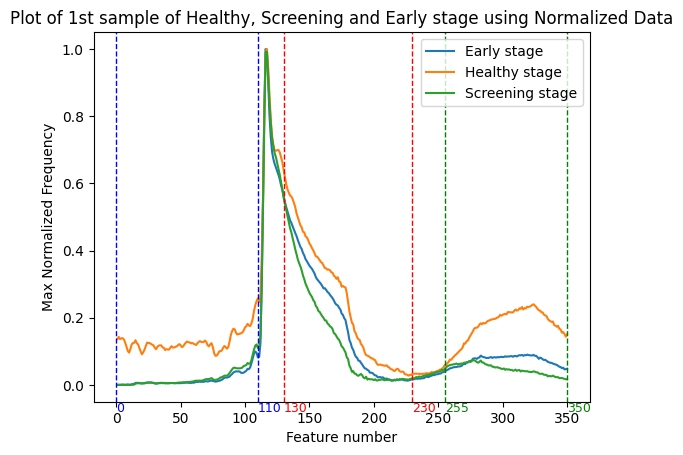

In [119]:
# Normalised Data Visualisation
df1 = pd.concat([x_df_norm, y_df], axis = 1)
df1.rename(columns = new_column_names, inplace = True)
filtered_df = df1.groupby('class_label').first()

plt.plot(filtered_df.iloc[0], label = "Early stage")
plt.plot(filtered_df.iloc[1], label = "Healthy stage")
plt.plot(filtered_df.iloc[4], label = "Screening stage")
plt.legend()
plt.title("Plot of 1st sample of Healthy, Screening and Early stage using Normalized Data")
plt.xlabel("Feature number")
plt.ylabel("Max Normalized Frequency")
vertical_lines_x = [0, 110]
vertical_lines_x_1 = [130, 230]
vertical_lines_x_2 = [255, 350]
for line_x in vertical_lines_x:
    plt.axvline(x=line_x, color='b', linestyle='--', lw = 1)
for line_x_1 in vertical_lines_x_1:
    plt.axvline(x=line_x_1, color='r', linestyle='--', lw = 1)
for line_x_2 in vertical_lines_x_2:
    plt.axvline(x=line_x_2, color='g', linestyle='--', lw = 1)
plt.text(0, -0.08, "0", color = "b", fontsize = 9)
plt.text(110, -0.08, "110", color = "b", fontsize = 9)
plt.text(130, -0.08, "130", color = "r", fontsize = 9)
plt.text(230, -0.08, "230", color = "r", fontsize = 9)
plt.text(255, -0.08, "255", color = "g", fontsize = 9)
plt.text(350, -0.08, "350", color = "g", fontsize = 9)

plt.plot()

### 2.4.3 Visualization on Standardized Data

[]

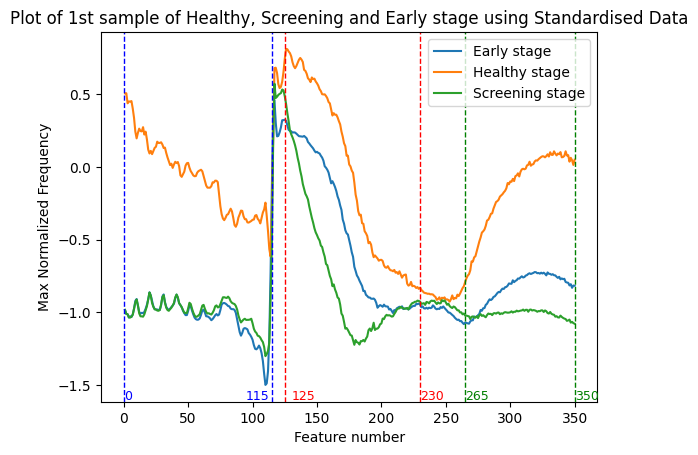

In [120]:
feature_columns = x_df_scaled.columns.tolist()
label = list(range(1,351))
new_column_names = {old_col: new_col for old_col, new_col in zip(x_df_scaled.columns, label)}
x_df_scaled.rename(columns=new_column_names, inplace=True)

df2 = pd.concat([x_df_scaled, y_df], axis = 1)
df2.rename(columns = new_column_names, inplace = True)
filtered_df = df2.groupby('class_label').first()

plt.plot(filtered_df.iloc[0], label = "Early stage")
plt.plot(filtered_df.iloc[1], label = "Healthy stage")
plt.plot(filtered_df.iloc[4], label = "Screening stage")
plt.legend()
plt.title("Plot of 1st sample of Healthy, Screening and Early stage using Standardised Data")
plt.xlabel("Feature number")
plt.ylabel("Max Normalized Frequency")
vertical_lines_x = [0, 115]
vertical_lines_x_1 = [125, 230]
vertical_lines_x_2 = [265, 350]
for line_x in vertical_lines_x:
    plt.axvline(x=line_x, color='b', linestyle='--', lw = 1)
for line_x_1 in vertical_lines_x_1:
    plt.axvline(x=line_x_1, color='r', linestyle='--', lw = 1)
for line_x_2 in vertical_lines_x_2:
    plt.axvline(x=line_x_2, color='g', linestyle='--', lw = 1)
plt.text(0, -1.6, "0", color = "b", fontsize = 9)
plt.text(95, -1.6, "115", color = "b", fontsize = 9)
plt.text(130, -1.6, "125", color = "r", fontsize = 9)
plt.text(230, -1.6, "230", color = "r", fontsize = 9)
plt.text(265, -1.6, "265", color = "g", fontsize = 9)
plt.text(350, -1.6, "350", color = "g", fontsize = 9)

plt.plot()

### 2.4.4 Visualization on Log-Standardized Data

[]

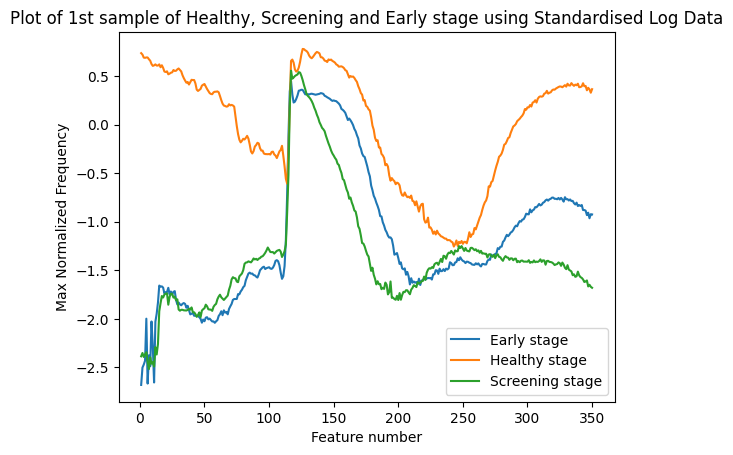

In [121]:
df3 = pd.concat([x_df_scaled_log, y_df], axis = 1)
df3.rename(columns = new_column_names, inplace = True)
filtered_df = df3.groupby('class_label').first()

plt.plot(filtered_df.iloc[0], label = "Early stage")
plt.plot(filtered_df.iloc[1], label = "Healthy stage")
plt.plot(filtered_df.iloc[4], label = "Screening stage")
plt.legend()
plt.title("Plot of 1st sample of Healthy, Screening and Early stage using Standardised Log Data")
plt.xlabel("Feature number")
plt.ylabel("Max Normalized Frequency")

plt.plot()

> This graph on log-standardized data is similar in shape with standardized data. Thus, we did not use log-standardized data for our analysis.

> Refering to the normalized and standardized data, we decided to extract feature columns that produced the largest difference

### 2.4.5 LOESS Smoothing

In [122]:
d1 = pd.concat([x_df_log, y_df], axis = 1)
d2 = pd.concat([x_df_norm, y_df], axis = 1)
d3 = pd.concat([x_df_scaled, y_df], axis = 1)
d4 = pd.concat([x_df_scaled_log, y_df], axis = 1)

d1.rename(columns = new_column_names, inplace = True)
d2.rename(columns = new_column_names, inplace = True)
d3.rename(columns = new_column_names, inplace = True)
d4.rename(columns = new_column_names, inplace = True)

In [123]:
choice = d3

In [124]:
filtered_df1 = choice.groupby('class_label').filter(lambda x: x['class_label'].iloc[0] == 'healthy')
filtered_df2 = choice.groupby('class_label').filter(lambda x: x['class_label'].iloc[0] == 'screening stage cancer')
filtered_df3 = choice.groupby('class_label').filter(lambda x: x['class_label'].iloc[0] == 'early stage cancer')

lengths = np.arange(51, 401)  # DNA fragment lengths from 51 to 400
frequencies1 = filtered_df1.iloc[:, :350].iloc[0,:]  # Average normalized frequency for each length
frequencies2 = filtered_df2.iloc[:, :350].iloc[0,:]  # Average normalized frequency for each length
frequencies3 = filtered_df3.iloc[:, :350].iloc[0,:] # Average normalized frequency for each length\

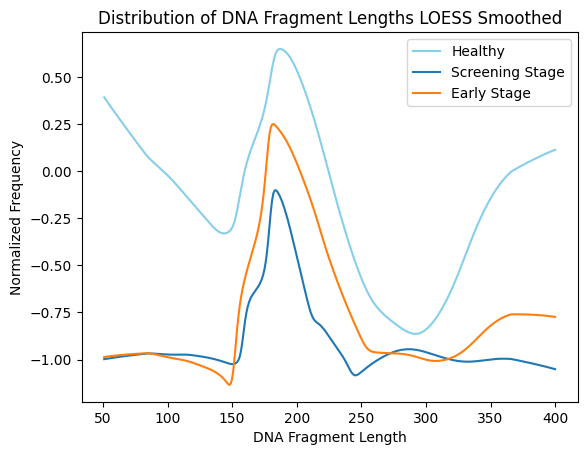

In [125]:
from statsmodels.nonparametric.smoothers_lowess import lowess
f1 = lowess(frequencies1, lengths, frac=.2)
f2 = lowess(frequencies2, lengths, frac=.2)
f3 = lowess(frequencies3, lengths, frac=.2)
#plt.bar(lengths, frequencies1, color='skyblue')
#plt.bar(lengths, frequencies2)
#plt.bar(lengths, frequencies3)

plt.xlabel('DNA Fragment Length')
plt.ylabel('Normalized Frequency')
plt.title('Distribution of DNA Fragment Lengths LOESS Smoothed')
plt.plot(f1[:, 0], f1[:, 1], label='Healthy', color='skyblue')
plt.plot(f2[:, 0], f2[:, 1], label='Screening Stage')
plt.plot(f3[:, 0], f3[:, 1], label='Early Stage')

plt.legend()
plt.show()

> Here, we tried out LOESS smoothing on the standardized data and observed that it is quite similar without the smoothing

### LOESS Transformation

In [126]:
def apply_lowess_to_row(row, x, frac):
    y = row.values  # Extract values from the row
    smoothed = lowess(y, x, frac=frac)  # Apply LOESS smoothing
    return smoothed[:, 1]


In [127]:
# Apply LOESS to x_df
result = x_df.apply(apply_lowess_to_row, args=(lengths, .2), axis=1)
smoothed_df = pd.DataFrame(result.tolist(), index=result.index)
smoothed_df.columns = x_df.columns

In [128]:
# Apply LOESS to x_test_df
result_t = x_test_df.apply(apply_lowess_to_row, args=(lengths, .2), axis=1)
smoothed_df_t = pd.DataFrame(result_t.tolist(), index=result_t.index)
smoothed_df_t.columns = x_df.columns

>

# **3. Models Selection**

## 3.1 Performance Metrics

**True Positive Rate (TPR)** and **True Negative Rate (TNR)** were used to determine the positive class accuracy and negative class accuracy. We make a metrics that combines both these scores when evaluating our models.

In [129]:
def calculate_tnr_tpr_summary(y_true, y_pred):
    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)
    #print(conf_matrix)

    # Extract true negatives (TN) for class 0 and 2
    tn_class_0 = conf_matrix[0, 0]
    fp_class_0_2 = conf_matrix[0, 2]
    fp_class_0_3 = conf_matrix[0, 3]

    # Calculate TNR for class 0
    tnr_class_0_2 = tn_class_0 / (tn_class_0 + fp_class_0_2) if (tn_class_0 + fp_class_0_2) != 0 else 0.0
    tnr_class_0_3 = tn_class_0 / (tn_class_0 + fp_class_0_3) if (tn_class_0 + fp_class_0_3) != 0 else 0.0

    # Extract true positives (TP) and false negatives (FN) for classes 2 and 3
    tp_class_2 = conf_matrix[2, 2]
    fn_class_2_0 = conf_matrix[2, 0]

    tp_class_3 = conf_matrix[3, 3]
    fn_class_3_0 = conf_matrix[3, 0]

    # Calculate TPR for classes 2 and 3
    tpr_class_2 = tp_class_2 / (tp_class_2 + fn_class_2_0) if (tp_class_2 + fn_class_2_0) != 0 else 0.0
    tpr_class_3 = tp_class_3 / (tp_class_3 + fn_class_3_0) if (tp_class_3 + fn_class_3_0) != 0 else 0.0

    # Combine TNR and TPR into a single score (e.g., average)
    score =  4 / ((1/tnr_class_0_2) + (1/tnr_class_0_3)+ (1/tpr_class_2) + (1/tpr_class_3))

    return score

custom_scorer = make_scorer(calculate_tnr_tpr_summary)

## 3.2 Hyperparameter Tuning

Grid Search and RandomizedCV were used to tune the parameters for ML models. We got inspiration from this website.
[Reference Link](https://www.kaggle.com/code/kenjee/titanic-project-example)

Note: We have commented out the code used for tuning so that the entire file runs faster without having to wait for tuning to be completed. We have run the tuning before selecting the best hyperparameters to be used in each model.

In [130]:
def performance(fitted_model):
  print(f"Best params: {fitted_model.best_params_}")
  print(f"Best score: {fitted_model.best_score_}")

## 3.3 Train test split

Types of feature scaling techniques used for our models:
1. Raw data
`x_train`, `x_val`, `y_train`, `y_val`
2. Normalized Data
`x_train_norm`, `x_val_norm`, `y_train_norm`, `y_val_norm`
3. Standardized Data
`x_train_scaled`, `x_val_scaled`, `y_train_scaled`, `y_val_scaled`



In [131]:
x_train, x_val, y_train, y_val = train_test_split(x_df, y_df_int, test_size = 0.2, random_state = 1)

# Select the regions for norm
vertical_lines_x = [0, 110]
vertical_lines_x_1 = [130, 230]
vertical_lines_x_2 = [255, 350]

# Slice the DataFrame for each region and concatenate them
x_df_norm_all = pd.concat([
    x_df_norm.iloc[:, vertical_lines_x[0]:vertical_lines_x[1]],
    x_df_norm.iloc[:, vertical_lines_x_1[0]:vertical_lines_x_1[1]],
    x_df_norm.iloc[:, vertical_lines_x_2[0]:vertical_lines_x_2[1]]
], axis=1)

x_test_norm_all = pd.concat([
    x_test_df_norm.iloc[:, vertical_lines_x[0]:vertical_lines_x[1]],
    x_test_df_norm.iloc[:, vertical_lines_x_1[0]:vertical_lines_x_1[1]],
    x_test_df_norm.iloc[:, vertical_lines_x_2[0]:vertical_lines_x_2[1]]
], axis=1)

# Select the regions for standardized
scaled_r1 = [0, 115]
scaled_r2 = [125, 230]
scaled_r3 = [265, 350]

# Slice the DataFrame for each region and concatenate them
x_df_scaled_all = pd.concat([
    x_df_scaled.iloc[:, scaled_r1[0]:scaled_r1[1]],
    x_df_scaled.iloc[:, scaled_r2[0]:scaled_r2[1]],
    x_df_scaled.iloc[:, scaled_r3[0]:scaled_r3[1]]
], axis=1)

x_test_scaled_all = pd.concat([
    x_test_df_scaled.iloc[:, scaled_r1[0]:scaled_r1[1]],
    x_test_df_scaled.iloc[:, scaled_r2[0]:scaled_r2[1]],
    x_test_df_scaled.iloc[:, scaled_r3[0]:scaled_r3[1]]], axis=1)

# RAW
x_train, x_val, y_train, y_val = train_test_split(x_df, y_df_int, test_size = 0.2, random_state = 1)
# NORM
x_train_norm, x_val_norm, y_train_norm, y_val_norm = train_test_split(x_df_norm_all, y_df_int, test_size = 0.2, random_state=1)
# SCALED
x_train_scaled, x_val_scaled, y_train_scaled, y_val_scaled = train_test_split(x_df_scaled_all, y_df_int, test_size = 0.2, random_state=1)
# SCALED without feature selection
x_train_scaled350, x_val_scaled350, y_train_scaled350, y_val_scaled350 = train_test_split(x_df_scaled, y_df_int, test_size = 0.2, random_state=1)
# Log SCALED
x_train_scaledlog, x_val_scaledlog, y_train_scaledlog, y_val_scaledlog = train_test_split(x_df_scaled_log, y_df_int, test_size = 0.2, random_state=1)

## 3.4 KNN

### 3.4.1 Raw

In [132]:
# Hyperparameter Tuning on Raw Data
# knn = KNeighborsClassifier()
# param_grid = {'n_neighbors' : [3,5,7,9],
#               'weights' : ['uniform', 'distance'],
#               'algorithm' : ['auto', 'ball_tree','kd_tree'],
#               'p' : [1,2]}

# clf_knn = GridSearchCV(knn, param_grid = param_grid, cv = 5,
#                        verbose = True, n_jobs = -1,
#                        scoring = custom_scorer)
# fitted_model = clf_knn.fit(x_df, y_df_int)
# performance(fitted_model)

> `Best params: {'algorithm': 'auto', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}`

> `Best score: 0.867430080028433`

In [133]:
# Create KNN Model and train it using the optimum parameters
knn = KNeighborsClassifier(algorithm = "auto", n_neighbors=3, p = 1, weights = "distance")
knn.fit(x_train, y_train)

y_pred = knn.predict(x_val)

cm_knn_raw = confusion_matrix(y_val, y_pred)

summary_score = calculate_tnr_tpr_summary(y_val, y_pred)
print(f"Summary score is: {summary_score}")

Summary score is: 0.8660592598834241


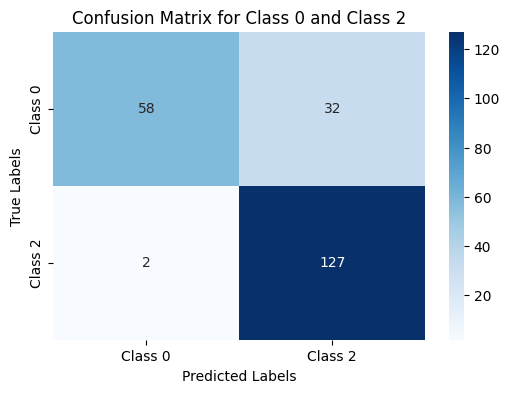

TPR_2_0 = 0.9844961240310077
TNR_2_0 = 0.6444444444444445


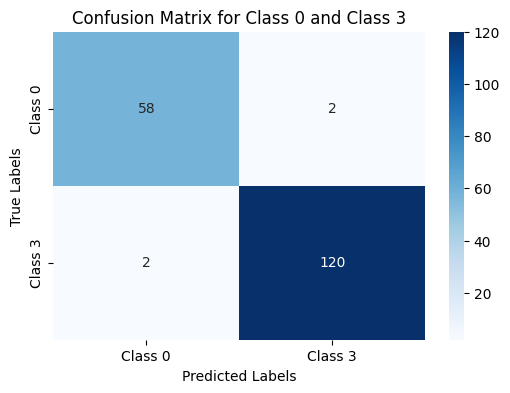

TPR_3_0 = 0.9836065573770492
TNR_3_0 = 0.9666666666666667


In [134]:
#Define the classes to keep
classes_to_keep = [0, 2]

# Extract the smaller confusion matrix
small_cm = cm_knn_raw[np.ix_(classes_to_keep, classes_to_keep)]

# Plot the smaller confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(small_cm, annot=True, cmap='Blues', fmt='g',
            xticklabels=['Class 0', 'Class 2'],
            yticklabels=['Class 0', 'Class 2'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Class 0 and Class 2')
plt.show()

tn, fp, fn, tp = small_cm.ravel()
tnr= tn / (tn + fp)
tpr=tp / (tp + fn)

print(f"TPR_2_0 = {tpr}")
print(f"TNR_2_0 = {tnr}")

#Define the classes to keep
classes_to_keep = [0, 3]

# Extract the smaller confusion matrix
small_cm = cm_knn_raw[np.ix_(classes_to_keep, classes_to_keep)]

# Plot the smaller confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(small_cm, annot=True, cmap='Blues', fmt='g',
            xticklabels=['Class 0', 'Class 3'],
            yticklabels=['Class 0', 'Class 3'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Class 0 and Class 3')
plt.show()

tn, fp, fn, tp = small_cm.ravel()
tnr= tn / (tn + fp)
tpr=tp / (tp + fn)

print(f"TPR_3_0 = {tpr}")
print(f"TNR_3_0 = {tnr}")

### 3.4.1 Normalized

In [135]:
# Hyperparameter Tuning on Raw Data
# knn = KNeighborsClassifier()
# param_grid = {'n_neighbors' : [3,5,7,9],
#               'weights' : ['uniform', 'distance'],
#               'algorithm' : ['auto', 'ball_tree','kd_tree'],
#               'p' : [1,2]}

# clf_knn = GridSearchCV(knn, param_grid = param_grid, cv = 5,
#                        verbose = True, n_jobs = -1,
#                        scoring = custom_scorer)
# fitted_model = clf_knn.fit(x_train_norm, y_train_norm)
# performance(fitted_model)

> `Best params: {'algorithm': 'auto', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}`

> `Best score: 0.8712497997020618`

In [136]:
# Create KNN Model and train it using the optimum parameters using Normalized data
knn = KNeighborsClassifier(algorithm = "auto", n_neighbors = 3, p = 1, weights = "distance")
knn.fit(x_train_norm, y_train_norm)

y_pred = knn.predict(x_val_norm)

cm_knn_norm = confusion_matrix(y_val_norm, y_pred)

summary_score = calculate_tnr_tpr_summary(y_val_norm, y_pred)
print(f"Summary score is: {summary_score}")

Summary score is: 0.8808230262397411


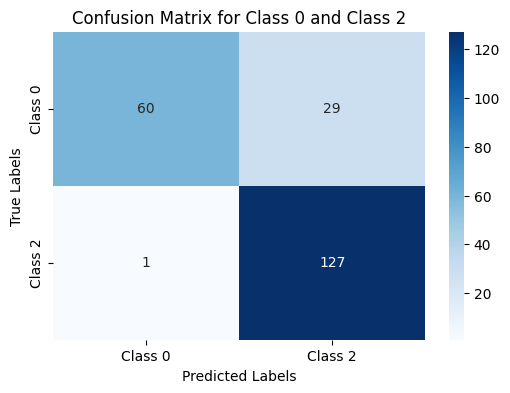

TPR_2_0 = 0.9921875
TNR_2_0 = 0.6741573033707865


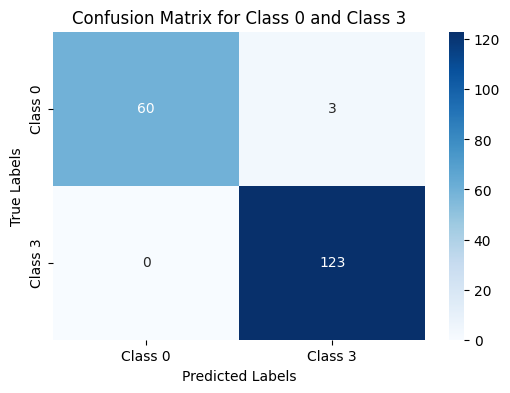

TPR_3_0 = 1.0
TNR_3_0 = 0.9523809523809523


In [137]:
#Define the classes to keep
classes_to_keep = [0, 2]

# Extract the smaller confusion matrix
small_cm = cm_knn_norm[np.ix_(classes_to_keep, classes_to_keep)]

# Plot the smaller confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(small_cm, annot=True, cmap='Blues', fmt='g',
            xticklabels=['Class 0', 'Class 2'],
            yticklabels=['Class 0', 'Class 2'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Class 0 and Class 2')
plt.show()

tn, fp, fn, tp = small_cm.ravel()
tnr= tn / (tn + fp)
tpr=tp / (tp + fn)

print(f"TPR_2_0 = {tpr}")
print(f"TNR_2_0 = {tnr}")

#Define the classes to keep
classes_to_keep = [0, 3]

# Extract the smaller confusion matrix
small_cm = cm_knn_norm[np.ix_(classes_to_keep, classes_to_keep)]

# Plot the smaller confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(small_cm, annot=True, cmap='Blues', fmt='g',
            xticklabels=['Class 0', 'Class 3'],
            yticklabels=['Class 0', 'Class 3'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Class 0 and Class 3')
plt.show()

tn, fp, fn, tp = small_cm.ravel()
tnr= tn / (tn + fp)
tpr=tp / (tp + fn)

print(f"TPR_3_0 = {tpr}")
print(f"TNR_3_0 = {tnr}")

### 3.4.1 Standardized

In [138]:
# Hyperparameter Tuning on Raw Data
# knn = KNeighborsClassifier()
# param_grid = {'n_neighbors' : [3,5,7,9],
#               'weights' : ['uniform', 'distance'],
#               'algorithm' : ['auto', 'ball_tree','kd_tree'],
#               'p' : [1,2]}

# clf_knn = GridSearchCV(knn, param_grid = param_grid, cv = 5,
#                        verbose = True, n_jobs = -1,
#                        scoring = custom_scorer)
# fitted_model = clf_knn.fit(x_train_scaled, y_train_scaled)
# performance(fitted_model)

> `Best params: {'algorithm': 'auto', 'n_neighbors': 3, 'p': 2, 'weights': 'distance'}`

> `Best score: 0.870716966275158`

In [139]:
# Create KNN Model and train it using the optimum parameters using Scaled data
knn = KNeighborsClassifier(algorithm = "auto", n_neighbors = 3, p = 2, weights = "distance")
knn.fit(x_train_scaled, y_train_scaled)

y_pred = knn.predict(x_val_scaled)

cm_knn_scaled = confusion_matrix(y_val_scaled, y_pred)

summary_score = calculate_tnr_tpr_summary(y_val_scaled, y_pred)
print(f"Summary score is: {summary_score}")

Summary score is: 0.8660745172505617


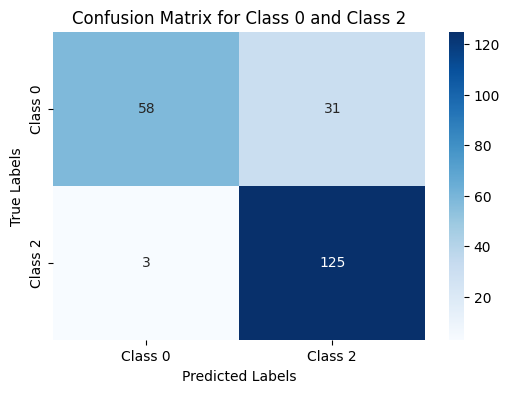

TPR_2_0 = 0.9765625
TNR_2_0 = 0.651685393258427


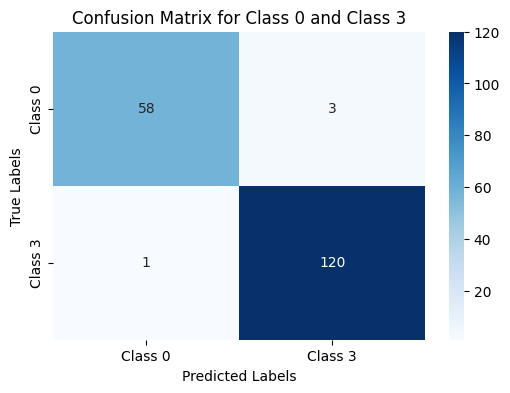

TPR_3_0 = 0.9917355371900827
TNR_3_0 = 0.9508196721311475


In [140]:
#Define the classes to keep
classes_to_keep = [0, 2]

# Extract the smaller confusion matrix
small_cm = cm_knn_scaled[np.ix_(classes_to_keep, classes_to_keep)]

# Plot the smaller confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(small_cm, annot=True, cmap='Blues', fmt='g',
            xticklabels=['Class 0', 'Class 2'],
            yticklabels=['Class 0', 'Class 2'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Class 0 and Class 2')
plt.show()

tn, fp, fn, tp = small_cm.ravel()
tnr= tn / (tn + fp)
tpr=tp / (tp + fn)

print(f"TPR_2_0 = {tpr}")
print(f"TNR_2_0 = {tnr}")

#Define the classes to keep
classes_to_keep = [0, 3]

# Extract the smaller confusion matrix
small_cm = cm_knn_scaled[np.ix_(classes_to_keep, classes_to_keep)]

# Plot the smaller confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(small_cm, annot=True, cmap='Blues', fmt='g',
            xticklabels=['Class 0', 'Class 3'],
            yticklabels=['Class 0', 'Class 3'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Class 0 and Class 3')
plt.show()

tn, fp, fn, tp = small_cm.ravel()
tnr= tn / (tn + fp)
tpr=tp / (tp + fn)

print(f"TPR_3_0 = {tpr}")
print(f"TNR_3_0 = {tnr}")

## 3.5 Artificial Neural Network (ANN)

### 3.5.1 Raw

In [141]:
tf.keras.utils.set_random_seed(42)
ann_raw = keras.models.Sequential()

# Adding layers
ann_raw.add(keras.layers.Dense(350, activation = "relu"))
ann_raw.add(keras.layers.Dense(200, activation = "relu"))
ann_raw.add(keras.layers.Dense(100, activation = "relu"))
ann_raw.add(keras.layers.Dense(50, activation = "relu"))
ann_raw.add(keras.layers.Dense(5, activation = "softmax"))

# compiling the model with loss function, optimizer and metrics
ann_raw.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

history = ann_raw.fit(x_train, y_train, epochs=43)

Epoch 1/43
82/82 [==============================] - 1s 3ms/step - loss: 1.5850 - accuracy: 0.3331
Epoch 2/43
82/82 [==============================] - 0s 4ms/step - loss: 1.5211 - accuracy: 0.4154
Epoch 3/43
82/82 [==============================] - 0s 3ms/step - loss: 1.4457 - accuracy: 0.4331
Epoch 4/43
82/82 [==============================] - 0s 4ms/step - loss: 1.3478 - accuracy: 0.4319
Epoch 5/43
82/82 [==============================] - 0s 4ms/step - loss: 1.2585 - accuracy: 0.4535
Epoch 6/43
82/82 [==============================] - 0s 4ms/step - loss: 1.2033 - accuracy: 0.4577
Epoch 7/43
82/82 [==============================] - 0s 4ms/step - loss: 1.1674 - accuracy: 0.4669
Epoch 8/43
82/82 [==============================] - 0s 5ms/step - loss: 1.1482 - accuracy: 0.4673
Epoch 9/43
82/82 [==============================] - 0s 5ms/step - loss: 1.1361 - accuracy: 0.4681
Epoch 10/43
82/82 [==============================] - 0s 5ms/step - loss: 1.1332 - accuracy: 0.4781
Epoch 11/43
82/82 [

In [142]:
# Prediction on validation data
ann_pred_raw = ann_raw.predict(x_val)
ann_pred_raw = np.argmax(ann_pred_raw, axis = 1)
# print(classification_report(y_val, ann_pred_raw))
ann_raw_score = calculate_tnr_tpr_summary(y_val, ann_pred_raw)
print(f"Summary score: {ann_raw_score}")

21/21 [==============================] - 0s 2ms/step
Summary score: 0.0


<ipython-input-129-89928f256f2e>:27: RuntimeWarning: divide by zero encountered in scalar divide
  score =  4 / ((1/tnr_class_0_2) + (1/tnr_class_0_3)+ (1/tpr_class_2) + (1/tpr_class_3))


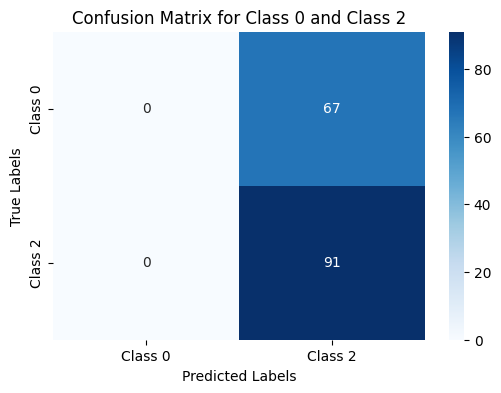

TPR_2_0 = 1.0
TNR_2_0 = 0.0


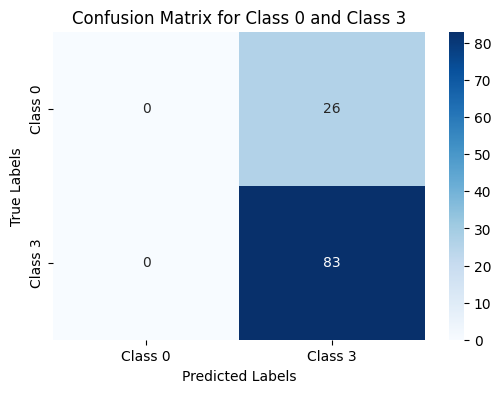

TPR_3_0 = 1.0
TNR_3_0 = 0.0


In [143]:
# Confusion Matrix
cm_ann_raw_val = confusion_matrix(y_val, ann_pred_raw)

# Define the classes to keep
classes_to_keep = [0, 2]

# Extract the smaller confusion matrix
small_cm = cm_ann_raw_val[np.ix_(classes_to_keep, classes_to_keep)]

# Plot the smaller confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(small_cm, annot=True, cmap='Blues', fmt='g',
            xticklabels=['Class 0', 'Class 2'],
            yticklabels=['Class 0', 'Class 2'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Class 0 and Class 2')
plt.show()

tn, fp, fn, tp = small_cm.ravel()
tnr= tn / (tn + fp)
tpr=tp / (tp + fn)

print(f"TPR_2_0 = {tpr}")
print(f"TNR_2_0 = {tnr}")

# Define the classes to keep
classes_to_keep = [0, 3]

# Extract the smaller confusion matrix
small_cm = cm_ann_raw_val[np.ix_(classes_to_keep, classes_to_keep)]

# Plot the smaller confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(small_cm, annot=True, cmap='Blues', fmt='g',
            xticklabels=['Class 0', 'Class 3'],
            yticklabels=['Class 0', 'Class 3'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Class 0 and Class 3')
plt.show()

tn, fp, fn, tp = small_cm.ravel()
tnr= tn / (tn + fp)
tpr=tp / (tp + fn)

print(f"TPR_3_0 = {tpr}")
print(f"TNR_3_0 = {tnr}")

### 3.5.2 Normalized

In [144]:
tf.keras.utils.set_random_seed(42)
ann_norm = keras.models.Sequential()

# Adding layers
ann_norm.add(keras.layers.Dense(225, activation = "relu"))
ann_norm.add(keras.layers.Dropout(0.2))
ann_norm.add(keras.layers.Dense(100, activation = "relu"))
ann_norm.add(keras.layers.Dense(50, activation = "relu"))
ann_norm.add(keras.layers.Dense(5, activation = "softmax"))

# compiling the model with loss function, optimizer and metrics
ann_norm.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

history = ann_norm.fit(x_train_norm, y_train_norm, epochs=65)

Epoch 1/65
82/82 [==============================] - 1s 3ms/step - loss: 1.5458 - accuracy: 0.3465
Epoch 2/65
82/82 [==============================] - 0s 3ms/step - loss: 1.3786 - accuracy: 0.4642
Epoch 3/65
82/82 [==============================] - 0s 2ms/step - loss: 1.2418 - accuracy: 0.4877
Epoch 4/65
82/82 [==============================] - 0s 2ms/step - loss: 1.1442 - accuracy: 0.5112
Epoch 5/65
82/82 [==============================] - 0s 2ms/step - loss: 1.0773 - accuracy: 0.5288
Epoch 6/65
82/82 [==============================] - 0s 3ms/step - loss: 1.0359 - accuracy: 0.5392
Epoch 7/65
82/82 [==============================] - 0s 2ms/step - loss: 1.0055 - accuracy: 0.5519
Epoch 8/65
82/82 [==============================] - 0s 3ms/step - loss: 0.9739 - accuracy: 0.5662
Epoch 9/65
82/82 [==============================] - 0s 2ms/step - loss: 0.9500 - accuracy: 0.5769
Epoch 10/65
82/82 [==============================] - 0s 2ms/step - loss: 0.9281 - accuracy: 0.5927
Epoch 11/65
82/82 [

In [145]:
# Prediction on validation data
ann_pred_norm = ann_norm.predict(x_val_norm)
ann_pred_norm = np.argmax(ann_pred_norm, axis = 1)
# print(classification_report(y_val_norm, ann_pred_norm))
ann_norm_score = calculate_tnr_tpr_summary(y_val_norm, ann_pred_norm)
print(f"Summary score = {ann_norm_score}")

21/21 [==============================] - 0s 2ms/step
Summary score = 0.5568974214415003


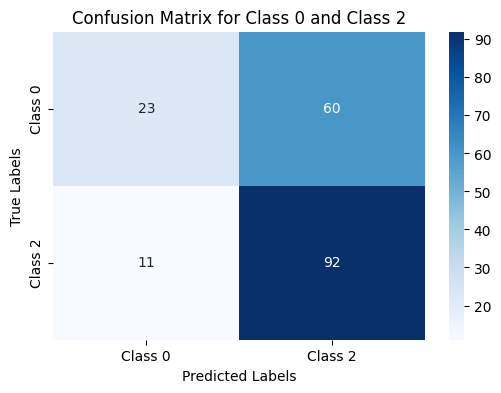

TPR_2_0 = 0.8932038834951457
TNR_2_0 = 0.27710843373493976


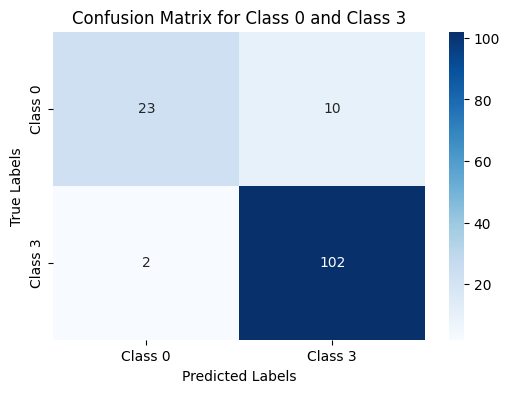

TPR_3_0 = 0.9807692307692307
TNR_3_0 = 0.696969696969697


In [146]:
# Confusion Matrix
cm_ann_norm_val = confusion_matrix(y_val_norm, ann_pred_norm)

# Define the classes to keep
classes_to_keep = [0, 2]

# Extract the smaller confusion matrix
small_cm = cm_ann_norm_val[np.ix_(classes_to_keep, classes_to_keep)]

# Plot the smaller confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(small_cm, annot=True, cmap='Blues', fmt='g',
            xticklabels=['Class 0', 'Class 2'],
            yticklabels=['Class 0', 'Class 2'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Class 0 and Class 2')
plt.show()

tn, fp, fn, tp = small_cm.ravel()
tnr= tn / (tn + fp)
tpr=tp / (tp + fn)

print(f"TPR_2_0 = {tpr}")
print(f"TNR_2_0 = {tnr}")

# Define the classes to keep
classes_to_keep = [0, 3]

# Extract the smaller confusion matrix
small_cm = cm_ann_norm_val[np.ix_(classes_to_keep, classes_to_keep)]

# Plot the smaller confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(small_cm, annot=True, cmap='Blues', fmt='g',
            xticklabels=['Class 0', 'Class 3'],
            yticklabels=['Class 0', 'Class 3'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Class 0 and Class 3')
plt.show()

tn, fp, fn, tp = small_cm.ravel()
tnr= tn / (tn + fp)
tpr=tp / (tp + fn)

print(f"TPR_3_0 = {tpr}")
print(f"TNR_3_0 = {tnr}")

### 3.5.3 Standardized

In [147]:
tf.keras.utils.set_random_seed(42)
ann_scaled = keras.models.Sequential()

# Adding layers
ann_scaled.add(keras.layers.Dense(230, activation = "relu"))
ann_scaled.add(keras.layers.Dense(160, activation = "relu"))
ann_scaled.add(keras.layers.Dense(100, activation = "relu"))
ann_scaled.add(keras.layers.Dense(50, activation = "relu"))
ann_scaled.add(keras.layers.Dense(5, activation = "softmax"))

# compiling the model with loss function, optimizer and metrics
ann_scaled.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

history = ann_scaled.fit(x_train_scaled, y_train_scaled, epochs=65)

Epoch 1/65
82/82 [==============================] - 1s 3ms/step - loss: 1.3387 - accuracy: 0.4108
Epoch 2/65
82/82 [==============================] - 0s 3ms/step - loss: 1.0992 - accuracy: 0.5158
Epoch 3/65
82/82 [==============================] - 0s 3ms/step - loss: 0.9968 - accuracy: 0.5569
Epoch 4/65
82/82 [==============================] - 0s 3ms/step - loss: 0.9292 - accuracy: 0.5788
Epoch 5/65
82/82 [==============================] - 0s 3ms/step - loss: 0.8839 - accuracy: 0.5965
Epoch 6/65
82/82 [==============================] - 0s 3ms/step - loss: 0.8491 - accuracy: 0.6146
Epoch 7/65
82/82 [==============================] - 0s 3ms/step - loss: 0.8223 - accuracy: 0.6285
Epoch 8/65
82/82 [==============================] - 0s 3ms/step - loss: 0.8046 - accuracy: 0.6358
Epoch 9/65
82/82 [==============================] - 0s 3ms/step - loss: 0.7821 - accuracy: 0.6558
Epoch 10/65
82/82 [==============================] - 0s 3ms/step - loss: 0.7699 - accuracy: 0.6473
Epoch 11/65
82/82 [

In [148]:
# Prediction on validation data
ann_pred_scaled = ann_scaled.predict(x_val_scaled)
ann_pred_scaled = np.argmax(ann_pred_scaled, axis = 1)
# print(classification_report(y_val_scaled, ann_pred_scaled))
ann_scaled_score = calculate_tnr_tpr_summary(y_val_scaled, ann_pred_scaled)
print(f"Summary score = {ann_scaled_score}")

21/21 [==============================] - 0s 2ms/step
Summary score = 0.7488550792796902


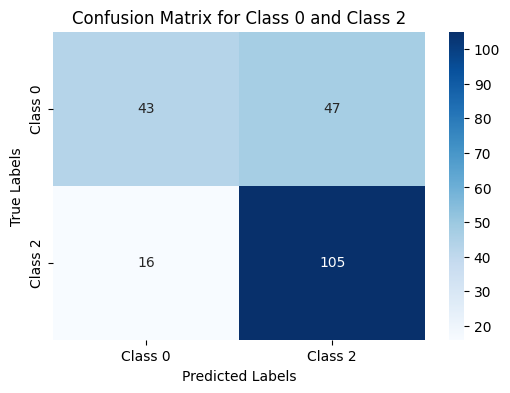

TPR_2_0 = 0.8677685950413223
TNR_2_0 = 0.4777777777777778


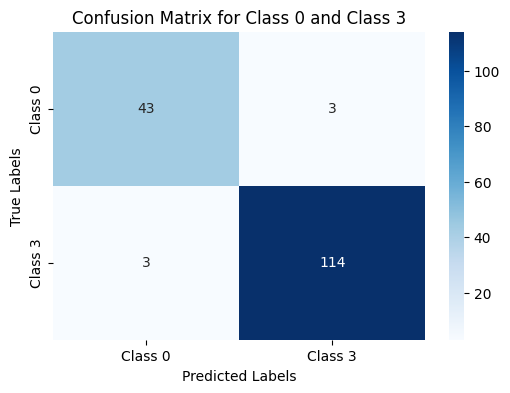

TPR_3_0 = 0.9743589743589743
TNR_3_0 = 0.9347826086956522


In [149]:
# Confusion Matrix
cm_ann_scaled_val = confusion_matrix(y_val_scaled, ann_pred_scaled)
# Define the classes to keep
classes_to_keep = [0, 2]

# Extract the smaller confusion matrix
small_cm = cm_ann_scaled_val[np.ix_(classes_to_keep, classes_to_keep)]

# Plot the smaller confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(small_cm, annot=True, cmap='Blues', fmt='g',
            xticklabels=['Class 0', 'Class 2'],
            yticklabels=['Class 0', 'Class 2'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Class 0 and Class 2')
plt.show()

tn, fp, fn, tp = small_cm.ravel()
tnr= tn / (tn + fp)
tpr=tp / (tp + fn)

print(f"TPR_2_0 = {tpr}")
print(f"TNR_2_0 = {tnr}")

# Define the classes to keep
classes_to_keep = [0, 3]

# Extract the smaller confusion matrix
small_cm = cm_ann_scaled_val[np.ix_(classes_to_keep, classes_to_keep)]

# Plot the smaller confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(small_cm, annot=True, cmap='Blues', fmt='g',
            xticklabels=['Class 0', 'Class 3'],
            yticklabels=['Class 0', 'Class 3'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Class 0 and Class 3')
plt.show()

tn, fp, fn, tp = small_cm.ravel()
tnr= tn / (tn + fp)
tpr=tp / (tp + fn)

print(f"TPR_3_0 = {tpr}")
print(f"TNR_3_0 = {tnr}")

### 3.5.4 Standardized (without feature selection)


> Since ANNs can learn and extract relevant features, we tried training the model on the entire standardized data without feature selection.

In [150]:
tf.keras.utils.set_random_seed(42)
ann_scaled350 = keras.models.Sequential()

# Adding layers
ann_scaled350.add(keras.layers.Dense(350, activation = "relu"))
ann_scaled350.add(keras.layers.Dense(280, activation = "relu"))
ann_scaled350.add(keras.layers.Dense(230, activation = "relu"))
ann_scaled350.add(keras.layers.Dense(160, activation = "relu"))
ann_scaled350.add(keras.layers.Dense(100, activation = "relu"))
ann_scaled350.add(keras.layers.Dense(50, activation = "relu"))
ann_scaled350.add(keras.layers.Dense(5, activation = "softmax"))

# compiling the model with loss function, optimizer and metrics
ann_scaled350.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=['accuracy'])

history = ann_scaled350.fit(x_train_scaled350, y_train_scaled350, epochs=67)


Epoch 1/67
82/82 [==============================] - 1s 5ms/step - loss: 1.2855 - accuracy: 0.4162
Epoch 2/67
82/82 [==============================] - 0s 5ms/step - loss: 1.0499 - accuracy: 0.5254
Epoch 3/67
82/82 [==============================] - 0s 5ms/step - loss: 0.9334 - accuracy: 0.5804
Epoch 4/67
82/82 [==============================] - 0s 5ms/step - loss: 0.8638 - accuracy: 0.6058
Epoch 5/67
82/82 [==============================] - 0s 5ms/step - loss: 0.8186 - accuracy: 0.6177
Epoch 6/67
82/82 [==============================] - 0s 4ms/step - loss: 0.7873 - accuracy: 0.6354
Epoch 7/67
82/82 [==============================] - 0s 5ms/step - loss: 0.7604 - accuracy: 0.6488
Epoch 8/67
82/82 [==============================] - 0s 4ms/step - loss: 0.7468 - accuracy: 0.6585
Epoch 9/67
82/82 [==============================] - 0s 5ms/step - loss: 0.7168 - accuracy: 0.6842
Epoch 10/67
82/82 [==============================] - 0s 4ms/step - loss: 0.7148 - accuracy: 0.6781
Epoch 11/67
82/82 [

In [151]:
# Prediction on validation data
ann_pred_scaled350 = ann_scaled350.predict(x_val_scaled350)
ann_pred_scaled350 = np.argmax(ann_pred_scaled350, axis = 1)
# print(classification_report(y_val_scaled350, ann_pred_scaled350))
ann_scaled350_score = calculate_tnr_tpr_summary(y_val_scaled350, ann_pred_scaled350)
print(f"Summary score = {ann_scaled350_score}")

21/21 [==============================] - 0s 2ms/step
Summary score = 0.6920475240655624


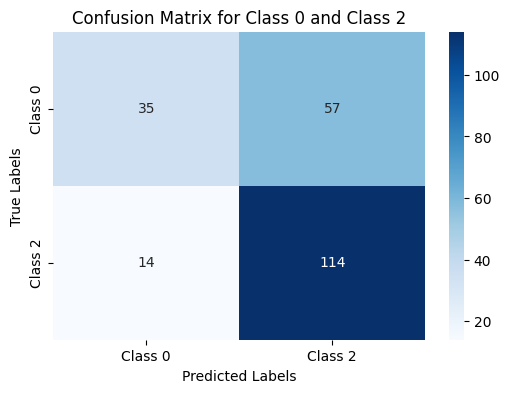

TPR_2_0 = 0.890625
TNR_2_0 = 0.3804347826086957


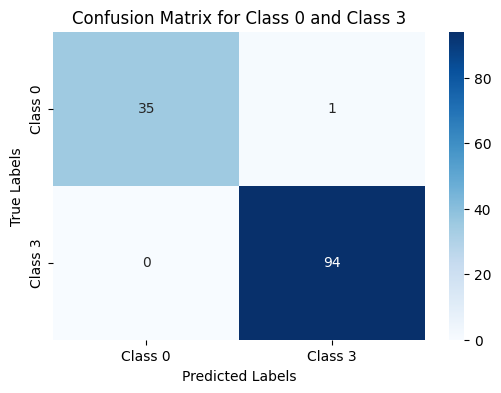

TPR_3_0 = 1.0
TNR_3_0 = 0.9722222222222222


In [152]:
# Confusion Matrix
cm_ann_scaled_val = confusion_matrix(y_val_scaled350, ann_pred_scaled350)

# Define the classes to keep
classes_to_keep = [0, 2]

# Extract the smaller confusion matrix
small_cm = cm_ann_scaled_val[np.ix_(classes_to_keep, classes_to_keep)]

# Plot the smaller confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(small_cm, annot=True, cmap='Blues', fmt='g',
            xticklabels=['Class 0', 'Class 2'],
            yticklabels=['Class 0', 'Class 2'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Class 0 and Class 2')
plt.show()

tn, fp, fn, tp = small_cm.ravel()
tnr= tn / (tn + fp)
tpr=tp / (tp + fn)

print(f"TPR_2_0 = {tpr}")
print(f"TNR_2_0 = {tnr}")

# Define the classes to keep
classes_to_keep = [0, 3]

# Extract the smaller confusion matrix
small_cm = cm_ann_scaled_val[np.ix_(classes_to_keep, classes_to_keep)]

# Plot the smaller confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(small_cm, annot=True, cmap='Blues', fmt='g',
            xticklabels=['Class 0', 'Class 3'],
            yticklabels=['Class 0', 'Class 3'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Class 0 and Class 3')
plt.show()

tn, fp, fn, tp = small_cm.ravel()
tnr= tn / (tn + fp)
tpr=tp / (tp + fn)

print(f"TPR_3_0 = {tpr}")
print(f"TNR_3_0 = {tnr}")

## 3.6 Decision Tree



### 3.6.1 Raw

In [153]:
# Fit Tree
tree1 = DecisionTreeClassifier(random_state=42)
tree1.fit(x_train, y_train)

# Predict and Evaluate
y_pred_dt = tree1.predict(x_val)
summary_score = calculate_tnr_tpr_summary(y_val, y_pred_dt)
print(f"Summary score: {summary_score}")

Summary score: 0.8593512010892292


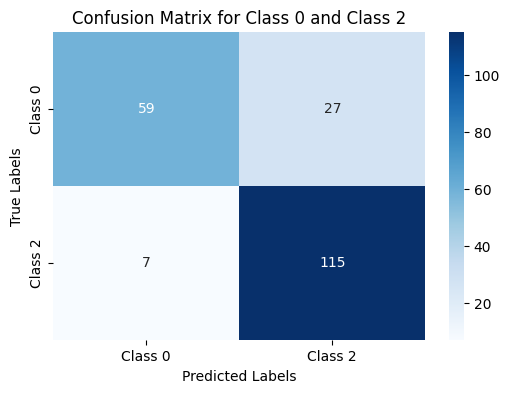

TPR_2_0 = 0.9426229508196722
TNR_2_0 = 0.686046511627907


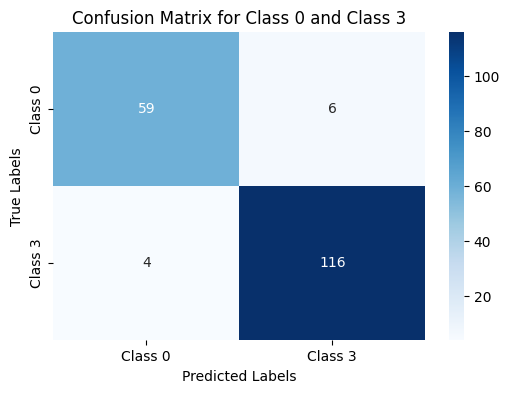

TPR_3_0 = 0.9666666666666667
TNR_3_0 = 0.9076923076923077


In [154]:
# Confusion Matrix
cm_dt_raw = confusion_matrix(y_val, y_pred_dt)

# Define the classes to keep
classes_to_keep = [0, 2]

# Extract the smaller confusion matrix
small_cm = cm_dt_raw[np.ix_(classes_to_keep, classes_to_keep)]

# Plot the smaller confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(small_cm, annot=True, cmap='Blues', fmt='g',
            xticklabels=['Class 0', 'Class 2'],
            yticklabels=['Class 0', 'Class 2'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Class 0 and Class 2')
plt.show()

tn, fp, fn, tp = small_cm.ravel()
tnr= tn / (tn + fp)
tpr=tp / (tp + fn)

print(f"TPR_2_0 = {tpr}")
print(f"TNR_2_0 = {tnr}")

# Define the classes to keep
classes_to_keep = [0, 3]

# Extract the smaller confusion matrix
small_cm = cm_dt_raw[np.ix_(classes_to_keep, classes_to_keep)]

# Plot the smaller confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(small_cm, annot=True, cmap='Blues', fmt='g',
            xticklabels=['Class 0', 'Class 3'],
            yticklabels=['Class 0', 'Class 3'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Class 0 and Class 3')
plt.show()

tn, fp, fn, tp = small_cm.ravel()
tnr= tn / (tn + fp)
tpr=tp / (tp + fn)

print(f"TPR_3_0 = {tpr}")
print(f"TNR_3_0 = {tnr}")

### 3.6.2 Normalized

In [155]:
# Fit Tree
tree2 = DecisionTreeClassifier(random_state=42)
tree2.fit(x_train_norm, y_train_norm)

# Predict and Evaluate
y_pred_dt = tree2.predict(x_val_norm)
summary_score = calculate_tnr_tpr_summary(y_val_norm, y_pred_dt)
print(f"Summary score: {summary_score}")

Summary score: 0.8509837145815684


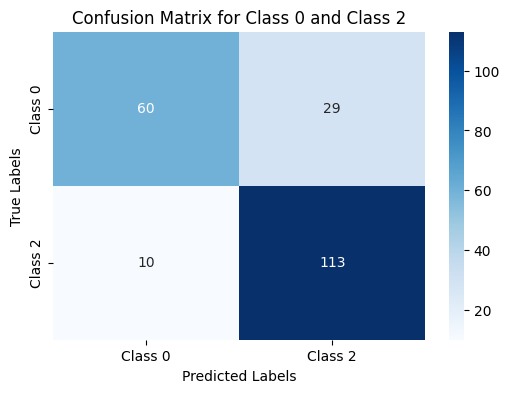

TPR_2_0 = 0.9186991869918699
TNR_2_0 = 0.6741573033707865


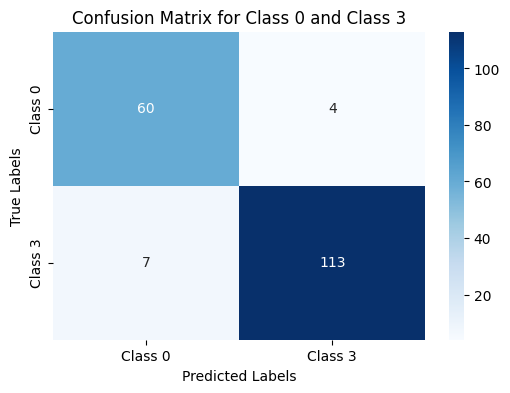

TPR_3_0 = 0.9416666666666667
TNR_3_0 = 0.9375


In [156]:
# Confusion Matrix
cm_dt_norm = confusion_matrix(y_val, y_pred_dt)

# Define the classes to keep
classes_to_keep = [0, 2]

# Extract the smaller confusion matrix
small_cm = cm_dt_norm[np.ix_(classes_to_keep, classes_to_keep)]

# Plot the smaller confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(small_cm, annot=True, cmap='Blues', fmt='g',
            xticklabels=['Class 0', 'Class 2'],
            yticklabels=['Class 0', 'Class 2'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Class 0 and Class 2')
plt.show()

tn, fp, fn, tp = small_cm.ravel()
tnr= tn / (tn + fp)
tpr=tp / (tp + fn)

print(f"TPR_2_0 = {tpr}")
print(f"TNR_2_0 = {tnr}")

# Define the classes to keep
classes_to_keep = [0, 3]

# Extract the smaller confusion matrix
small_cm = cm_dt_norm[np.ix_(classes_to_keep, classes_to_keep)]

# Plot the smaller confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(small_cm, annot=True, cmap='Blues', fmt='g',
            xticklabels=['Class 0', 'Class 3'],
            yticklabels=['Class 0', 'Class 3'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Class 0 and Class 3')
plt.show()

tn, fp, fn, tp = small_cm.ravel()
tnr= tn / (tn + fp)
tpr=tp / (tp + fn)

print(f"TPR_3_0 = {tpr}")
print(f"TNR_3_0 = {tnr}")

### 3.6.3 Standardized

In [157]:
# Fit Tree
tree3 = DecisionTreeClassifier(random_state=42)
tree3.fit(x_train_scaled, y_train_scaled)

# Predict and Evaluate
y_pred_dt = tree3.predict(x_val_scaled)
summary_score = calculate_tnr_tpr_summary(y_val_scaled, y_pred_dt)
print(f"Summary score: {summary_score}")

Summary score: 0.8669118437748673


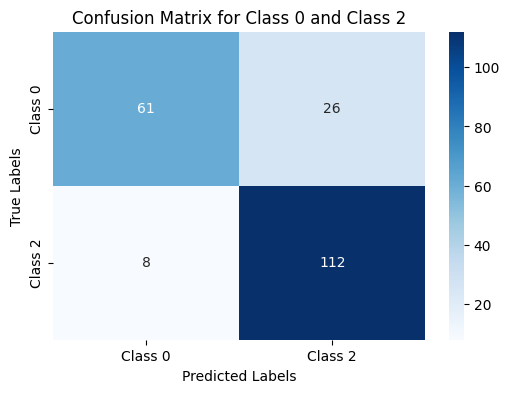

TPR_2_0 = 0.9333333333333333
TNR_2_0 = 0.7011494252873564


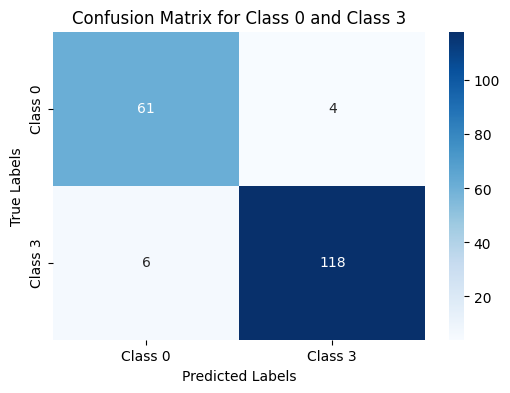

TPR_3_0 = 0.9516129032258065
TNR_3_0 = 0.9384615384615385


In [158]:
# Confusion Matrix
cm_dt_scaled = confusion_matrix(y_val, y_pred_dt)

# Define the classes to keep
classes_to_keep = [0, 2]

# Extract the smaller confusion matrix
small_cm = cm_dt_scaled[np.ix_(classes_to_keep, classes_to_keep)]

# Plot the smaller confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(small_cm, annot=True, cmap='Blues', fmt='g',
            xticklabels=['Class 0', 'Class 2'],
            yticklabels=['Class 0', 'Class 2'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Class 0 and Class 2')
plt.show()

tn, fp, fn, tp = small_cm.ravel()
tnr= tn / (tn + fp)
tpr=tp / (tp + fn)

print(f"TPR_2_0 = {tpr}")
print(f"TNR_2_0 = {tnr}")

# Define the classes to keep
classes_to_keep = [0, 3]

# Extract the smaller confusion matrix
small_cm = cm_dt_scaled[np.ix_(classes_to_keep, classes_to_keep)]

# Plot the smaller confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(small_cm, annot=True, cmap='Blues', fmt='g',
            xticklabels=['Class 0', 'Class 3'],
            yticklabels=['Class 0', 'Class 3'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Class 0 and Class 3')
plt.show()

tn, fp, fn, tp = small_cm.ravel()
tnr= tn / (tn + fp)
tpr=tp / (tp + fn)

print(f"TPR_3_0 = {tpr}")
print(f"TNR_3_0 = {tnr}")

### 3.6.4 Hyperparameter Tuning

In [159]:
''' tree = DecisionTreeClassifier(random_state=42)
parameters = {'criterion':['gini','entropy'],
              'max_depth':np.arange(1,21).tolist()[0::2],
              'min_samples_split':np.arange(2,11).tolist()[0::2],
              'max_leaf_nodes':np.arange(3,26).tolist()[0::2]}
g1 = GridSearchCV(tree, parameters, cv=5, n_jobs=-1, scoring = custom_scorer)

# conduct grid search
best_clf_dt = g1.fit(x_train, y_train)
performance(best_clf_dt)  '''

" tree = DecisionTreeClassifier(random_state=42)\nparameters = {'criterion':['gini','entropy'],\n              'max_depth':np.arange(1,21).tolist()[0::2],\n              'min_samples_split':np.arange(2,11).tolist()[0::2],\n              'max_leaf_nodes':np.arange(3,26).tolist()[0::2]}\ng1 = GridSearchCV(tree, parameters, cv=5, n_jobs=-1, scoring = custom_scorer)\n\n# conduct grid search\nbest_clf_dt = g1.fit(x_train, y_train)\nperformance(best_clf_dt)  "

Best Parameters: {'criterion': 'gini', 'max_depth': 7, 'max_leaf_nodes': 25, 'min_samples_split': 2}

In [160]:
# Fit Tree
tree = DecisionTreeClassifier(random_state=42, criterion= 'gini', max_depth= 7, max_leaf_nodes= 25, min_samples_split= 2)
tree.fit(x_train, y_train)

# Predict and Evaluate
y_pred_dt = tree.predict(x_val)
summary_score = calculate_tnr_tpr_summary(y_val, y_pred_dt)
print(f"Summary score: {summary_score}")

Summary score: 0.6858212855787235


### Visualise Tree

In [161]:
export_graphviz(tree,
                out_file="tree.dot",
                class_names=['healthy',
                             'late stage cancer',
                             'screening stage cancer',
                             'early stage cancer',
                             'mid stage cancer'],
                feature_names=x_train.columns.tolist(),
                impurity=False,
                filled=True)

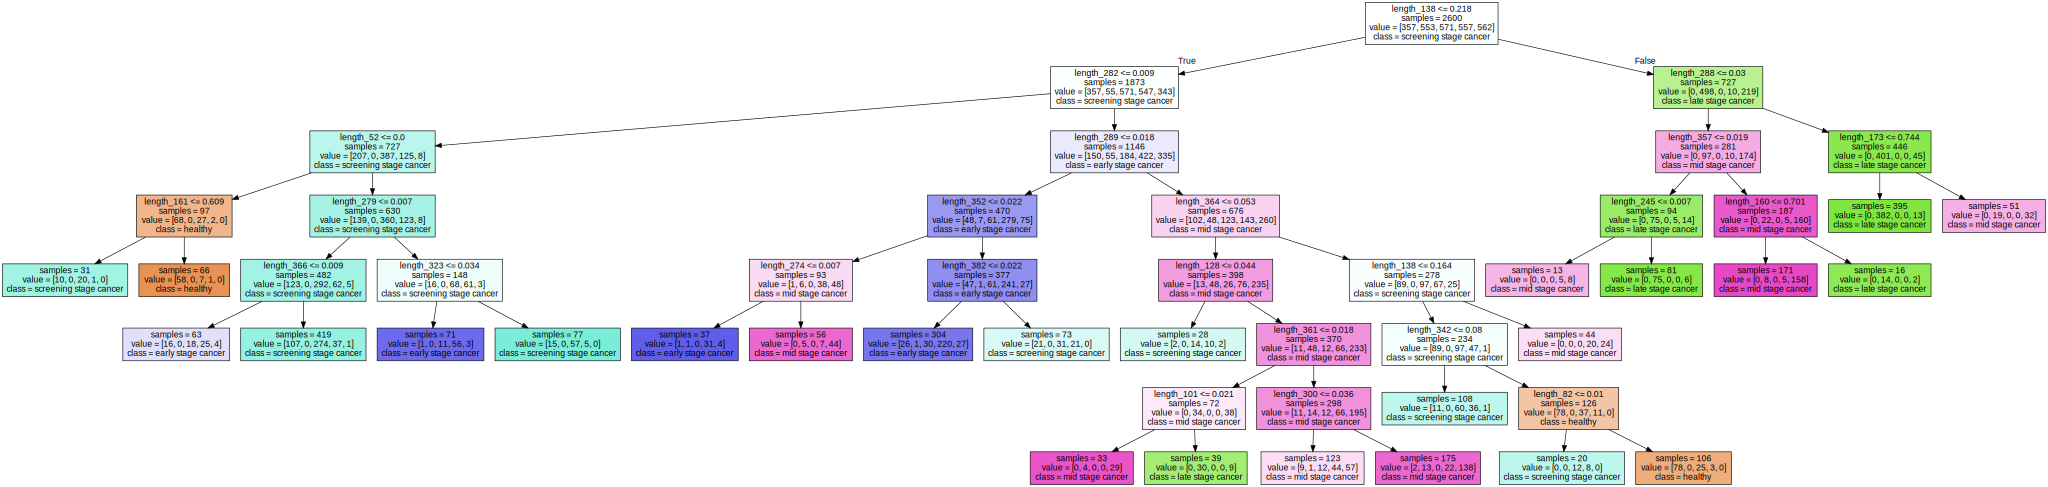

In [162]:
with open("tree.dot") as f:
 dot_graph = f.read()
graphviz.Source(dot_graph)
# If got fileNotFoundError when run locally, need to add Graphviz to PATH

## 3.7 Random Forest


### 3.7.1 Raw without SMOTE without Tuning


In [163]:
x_train_before, x_val_before, y_train_before, y_val_before = train_test_split(x_df_before, y_df_int_before, test_size = 0.2, random_state = 1)
# Base model
rf= RandomForestClassifier(random_state=1 )

rf.fit(x_train_before, y_train_before)

#Evaluate using raw data
y_pred= rf.predict(x_val_before)
summary_score = calculate_tnr_tpr_summary(y_val_before, y_pred)
print(f"Summary score: {summary_score}")


Summary score: 0.333021515434986


### 3.7.2 Raw with SMOTE without Tuning

In [164]:
# Base model
rf= RandomForestClassifier(random_state=1 )

rf.fit(x_train, y_train)

#Evaluate using raw data
y_pred= rf.predict(x_val)
summary_score = calculate_tnr_tpr_summary(y_val, y_pred)
print(f"Summary score: {summary_score}")

Summary score: 0.920661858294442


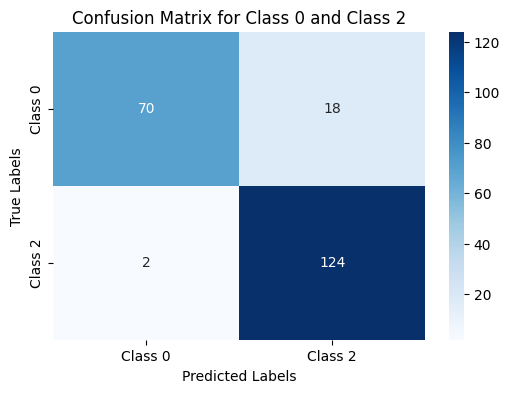

TPR_2_0 = 0.9841269841269841
TNR_2_0 = 0.7954545454545454


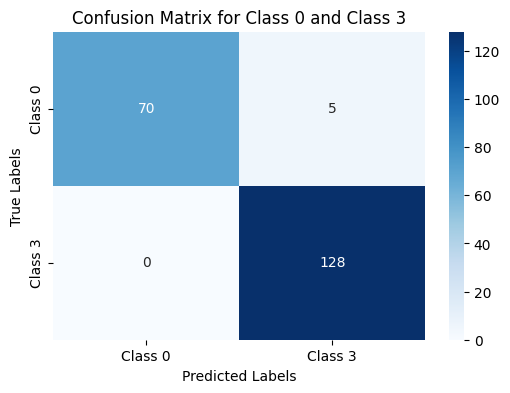

TPR_3_0 = 1.0
TNR_3_0 = 0.9333333333333333


In [165]:
cm = confusion_matrix(y_val, y_pred)

# Define the classes to keep
classes_to_keep = [0, 2]

# Extract the smaller confusion matrix
small_cm = cm[np.ix_(classes_to_keep, classes_to_keep)]

# Plot the smaller confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(small_cm, annot=True, cmap='Blues', fmt='g',
            xticklabels=['Class 0', 'Class 2'],
            yticklabels=['Class 0', 'Class 2'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Class 0 and Class 2')
plt.show()

tn, fp, fn, tp = small_cm.ravel()
tnr= tn / (tn + fp)
tpr=tp / (tp + fn)

print(f"TPR_2_0 = {tpr}")
print(f"TNR_2_0 = {tnr}")

# Define the classes to keep
classes_to_keep = [0, 3]

# Extract the smaller confusion matrix
small_cm = cm[np.ix_(classes_to_keep, classes_to_keep)]

# Plot the smaller confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(small_cm, annot=True, cmap='Blues', fmt='g',
            xticklabels=['Class 0', 'Class 3'],
            yticklabels=['Class 0', 'Class 3'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Class 0 and Class 3')
plt.show()

tn, fp, fn, tp = small_cm.ravel()
tnr= tn / (tn + fp)
tpr= tp / (tp + fn)

print(f"TPR_3_0 = {tpr}")
print(f"TNR_3_0 = {tnr}")

### 3.7.3 Normalized with SMOTE without Tuning

In [166]:
rf = RandomForestClassifier(random_state = 1)

rf.fit(x_train_norm, y_train_norm)

#Evaluate using raw data
y_pred= rf.predict(x_val_norm)
summary_score = calculate_tnr_tpr_summary(y_val_norm, y_pred)
print(f"Summary score: {summary_score}")

#classification report
report = classification_report(y_val_norm, y_pred)
print(report)

Summary score: 0.920661858294442
              precision    recall  f1-score   support

           0       0.97      0.75      0.85        93
           1       0.97      0.98      0.97       147
           2       0.82      0.96      0.88       129
           3       0.92      0.91      0.91       143
           4       0.95      0.93      0.94       138

    accuracy                           0.92       650
   macro avg       0.92      0.91      0.91       650
weighted avg       0.92      0.92      0.92       650



### 3.7.4 Tuning for Random-Forest

In [167]:
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

In [168]:
# With hyperparameter tuning
#rf = RandomForestClassifier(random_state = 1)
#param_grid =  {'n_estimators': [100,150,200],
#              'criterion':['gini','entropy'],
#              'bootstrap': [True, False],
#                                 'max_depth': [15, 20, 25],
#                                 'max_features': ['sqrt', 'log2'],
#                                 'min_samples_leaf': [2,3],
#                                 'min_samples_split': [4,6],
#              'random_state': [1], 'warm_start': [True]
#              }
#Create a GridSearchCV object with cross-validation
#clf_rf = GridSearchCV(rf, param_grid = param_grid, cv = 5, scoring = custom_scorer,
#                      verbose = 1, n_jobs = -1)

#Fit the GridSearchCV object on the data
#clf_rf.fit(x_train, y_train)

#clf_rf.cv_results_

In [169]:
#best_params = clf_rf.best_params_
#best_score = f1_score(y_val, clf_rf.predict(x_val),  average='macro')

#print("Best F1 Score: {:0.4f}".format(best_score))

#clf_performance(clf_rf,'Random Forest')

`Best Params: random_state=1, n_estimators=100, criterion='entropy', bootstrap=False,
                           max_depth=20, max_features='log2', min_samples_leaf=2, min_samples_split=6,
                            warm_start=True`

In [170]:
rf= RandomForestClassifier(random_state=1, n_estimators=100, criterion='entropy', bootstrap=False,
                           max_depth=20, max_features='log2', min_samples_leaf=2, min_samples_split=6,
                            warm_start=True)
rf.fit(x_train, y_train)

#Evaluate using raw data
y_pred= rf.predict(x_val)
summary_score = calculate_tnr_tpr_summary(y_val, y_pred)
print(f"Summary score: {summary_score}")

Summary score: 0.9190221129333821


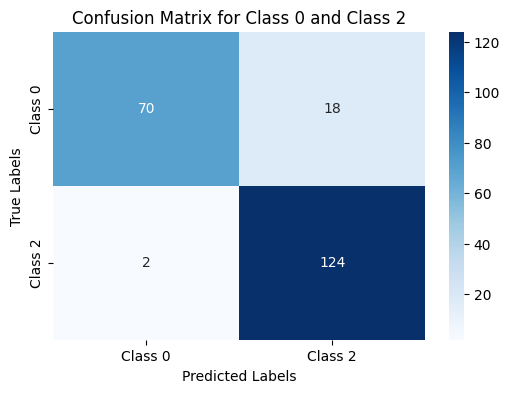

TPR_2_0 = 0.9841269841269841
TNR_2_0 = 0.7954545454545454


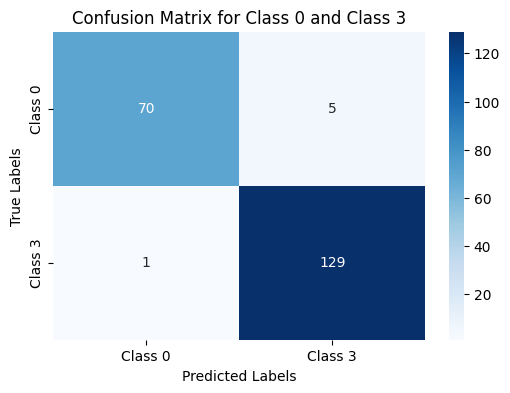

TPR_3_0 = 0.9923076923076923
TNR_3_0 = 0.9333333333333333


In [171]:
# Define the classes to keep
cm_rt_raw = confusion_matrix(y_val, y_pred)
classes_to_keep = [0, 2]

# Extract the smaller confusion matrix
small_cm = cm_rt_raw[np.ix_(classes_to_keep, classes_to_keep)]

# Plot the smaller confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(small_cm, annot=True, cmap='Blues', fmt='g',
            xticklabels=['Class 0', 'Class 2'],
            yticklabels=['Class 0', 'Class 2'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Class 0 and Class 2')
plt.show()

tn, fp, fn, tp = small_cm.ravel()
tnr= tn / (tn + fp)
tpr=tp / (tp + fn)

print(f"TPR_2_0 = {tpr}")
print(f"TNR_2_0 = {tnr}")

# Define the classes to keep
cm_rt_raw = confusion_matrix(y_val, y_pred)
classes_to_keep = [0, 3]

# Extract the smaller confusion matrix
small_cm = cm_rt_raw[np.ix_(classes_to_keep, classes_to_keep)]

# Plot the smaller confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(small_cm, annot=True, cmap='Blues', fmt='g',
            xticklabels=['Class 0', 'Class 3'],
            yticklabels=['Class 0', 'Class 3'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Class 0 and Class 3')
plt.show()

tn, fp, fn, tp = small_cm.ravel()
tnr= tn / (tn + fp)
tpr=tp / (tp + fn)

print(f"TPR_3_0 = {tpr}")
print(f"TNR_3_0 = {tnr}")

### 3.7.5 Normalized with Tuning

In [172]:
#rf = RandomForestClassifier(random_state = 1)
#param_grid =  {'n_estimators': [100,150,200],
#               'criterion':['gini','entropy'],
#               'bootstrap': [True, False],
#                                  'max_depth': [15, 20, 25],
#                                  'max_features': ['sqrt', 'log2'],
#                                  'min_samples_leaf': [2,3],
#                                  'min_samples_split': [4,6],
#               'random_state': [1], 'warm_start': [True]
#               }
# Create a GridSearchCV object with cross-validation
#clf_rf = GridSearchCV(rf, param_grid = param_grid, cv = 5, verbose = 1, n_jobs = -1)

# Fit the GridSearchCV object on the data
#clf_rf.fit(x_train_norm, y_train_norm)

#clf_rf.cv_results_

In [173]:
# Print the best hyperparameters and the corresponding score
#best_params = clf_rf.best_params_
#best_score = f1_score(y_val_norm, clf_rf.predict(x_val_norm),  average='macro')

#print("Best F1 Score: {:0.4f}".format(best_score))

#clf_performance(clf_rf,'Random Forest')

`Best Params: random_state=1, n_estimators=150, criterion='entropy', bootstrap=False,
                          max_depth=20, max_features='sqrt', min_samples_leaf=2, min_samples_split=4,
                            warm_start=True`

In [174]:
rf= RandomForestClassifier(random_state=1, n_estimators=150, criterion='entropy', bootstrap=False,
                          max_depth=20, max_features='sqrt', min_samples_leaf=2, min_samples_split=4,
                            warm_start=True)

rf.fit(x_train_norm, y_train_norm)

#Evaluate using raw data
y_pred= rf.predict(x_val_norm)
summary_score = calculate_tnr_tpr_summary(y_val_norm, y_pred)
print(f"summary score: {summary_score}")

#classification report
report = classification_report(y_val_norm, y_pred)
print(report)

summary score: 0.9398745885008825
              precision    recall  f1-score   support

           0       0.95      0.82      0.88        93
           1       0.97      0.97      0.97       147
           2       0.84      0.95      0.89       129
           3       0.92      0.90      0.91       143
           4       0.94      0.94      0.94       138

    accuracy                           0.92       650
   macro avg       0.93      0.92      0.92       650
weighted avg       0.93      0.92      0.92       650



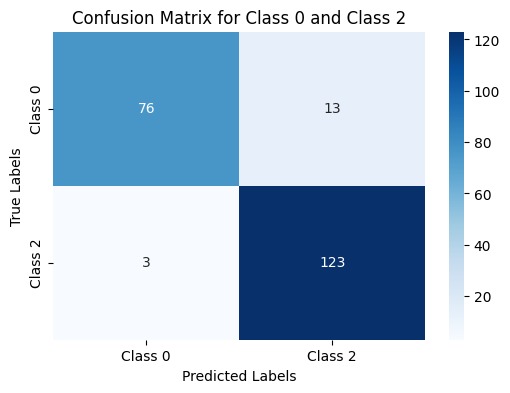

TPR_2_0 = 0.9761904761904762
TNR_2_0 = 0.8539325842696629


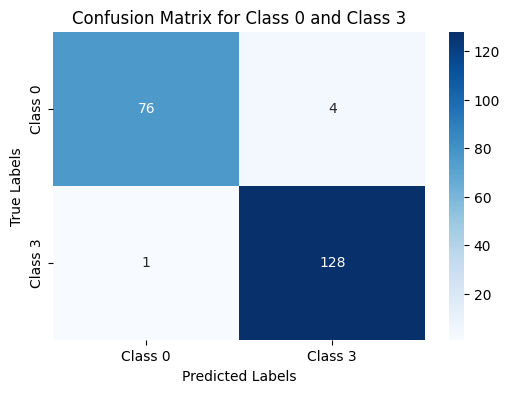

TPR_3_0 = 0.9922480620155039
TNR_3_0 = 0.95


In [175]:
# Define the classes to keep
cm_rt_norm = confusion_matrix(y_val_norm, y_pred)
classes_to_keep = [0, 2]

# Extract the smaller confusion matrix
small_cm = cm_rt_norm[np.ix_(classes_to_keep, classes_to_keep)]

# Plot the smaller confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(small_cm, annot=True, cmap='Blues', fmt='g',
            xticklabels=['Class 0', 'Class 2'],
            yticklabels=['Class 0', 'Class 2'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Class 0 and Class 2')
plt.show()

tn, fp, fn, tp = small_cm.ravel()
tnr= tn / (tn + fp)
tpr=tp / (tp + fn)

print(f"TPR_2_0 = {tpr}")
print(f"TNR_2_0 = {tnr}")

# Define the classes to keep
cm_rt_norm = confusion_matrix(y_val_norm, y_pred)
classes_to_keep = [0, 3]

# Extract the smaller confusion matrix
small_cm = cm_rt_norm[np.ix_(classes_to_keep, classes_to_keep)]

# Plot the smaller confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(small_cm, annot=True, cmap='Blues', fmt='g',
            xticklabels=['Class 0', 'Class 3'],
            yticklabels=['Class 0', 'Class 3'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Class 0 and Class 3')
plt.show()

tn, fp, fn, tp = small_cm.ravel()
tnr= tn / (tn + fp)
tpr=tp / (tp + fn)

print(f"TPR_3_0 = {tpr}")
print(f"TNR_3_0 = {tnr}")

### 3.7.6 Standardized

In [176]:
#rf = RandomForestClassifier(random_state = 1)
#param_grid =  {'n_estimators': [100,150,200],
#               'criterion':['gini','entropy'],
#               'bootstrap': [True, False],
#                                  'max_depth': [15, 20, 25],
#                                  'max_features': ['sqrt', 'log2'],
#                                  'min_samples_leaf': [2,3],
#                                  'min_samples_split': [4,6],
#               'random_state': [1], 'warm_start': [True]
#               }
# Create a GridSearchCV object with cross-validation
#clf_rf = GridSearchCV(rf, param_grid = param_grid, cv = 5, verbose = 1, n_jobs = -1)

# Fit the GridSearchCV object on the data
#clf_rf.fit(x_train_scaled, y_train_scaled)

#clf_rf.cv_results_

In [177]:
# Print the best hyperparameters and the corresponding score
#best_params = clf_rf.best_params_
#best_score = f1_score(y_val_scaled, clf_rf.predict(x_val_scaled),  average='macro')

#print("Best F1 Score: {:0.4f}".format(best_score))

#clf_performance(clf_rf,'Random Forest')

`Best Params: random_state=1, n_estimators=200, criterion='entropy', bootstrap=True,
                           max_depth=20, max_features='log2', min_samples_leaf=2, min_samples_split=4,
                        warm_start=True`

In [178]:
rf= RandomForestClassifier(random_state=1, n_estimators=200, criterion='entropy', bootstrap=True,
                           max_depth=20, max_features='log2', min_samples_leaf=2, min_samples_split=4,
                        warm_start=True)

rf.fit(x_train_scaled, y_train_scaled)

#Evaluate using raw data
y_pred= rf.predict(x_val_scaled)
summary_score = calculate_tnr_tpr_summary(y_val_scaled, y_pred)
print(f"Summary score: {summary_score}")


Summary score: 0.9306294497134191


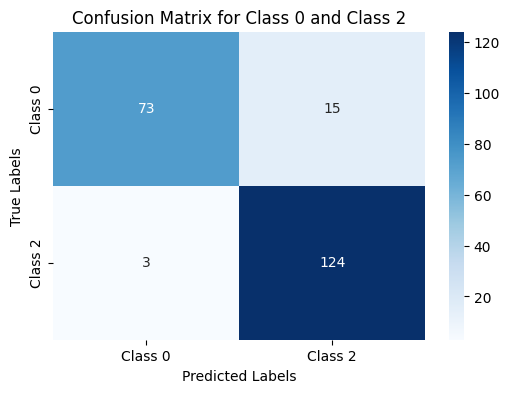

TPR_2_0 = 0.9763779527559056
TNR_2_0 = 0.8295454545454546


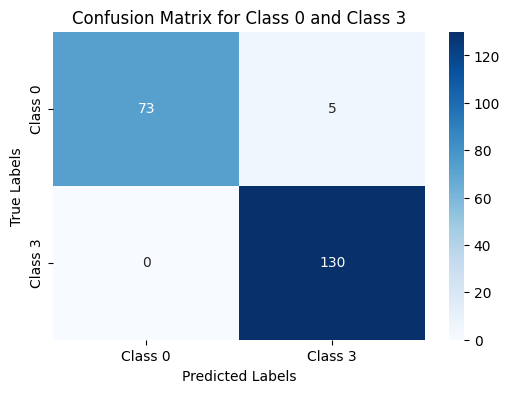

TPR_3_0 = 1.0
TNR_3_0 = 0.9358974358974359


In [179]:
cm_rt_scaled = confusion_matrix(y_val_norm, y_pred)
classes_to_keep = [0, 2]

# Extract the smaller confusion matrix
small_cm = cm_rt_scaled[np.ix_(classes_to_keep, classes_to_keep)]

# Plot the smaller confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(small_cm, annot=True, cmap='Blues', fmt='g',
            xticklabels=['Class 0', 'Class 2'],
            yticklabels=['Class 0', 'Class 2'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Class 0 and Class 2')
plt.show()

tn, fp, fn, tp = small_cm.ravel()
tnr= tn / (tn + fp)
tpr=tp / (tp + fn)

print(f"TPR_2_0 = {tpr}")
print(f"TNR_2_0 = {tnr}")

# Define the classes to keep
cm_rt_norm = confusion_matrix(y_val_norm, y_pred)
classes_to_keep = [0, 3]

# Extract the smaller confusion matrix
small_cm = cm_rt_scaled[np.ix_(classes_to_keep, classes_to_keep)]

# Plot the smaller confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(small_cm, annot=True, cmap='Blues', fmt='g',
            xticklabels=['Class 0', 'Class 3'],
            yticklabels=['Class 0', 'Class 3'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Class 0 and Class 3')
plt.show()

tn, fp, fn, tp = small_cm.ravel()
tnr= tn / (tn + fp)
tpr=tp / (tp + fn)

print(f"TPR_3_0 = {tpr}")
print(f"TNR_3_0 = {tnr}")

# **4. Predict Test data using Best Model (Random Forest)**

### Raw

              precision    recall  f1-score   support

           0       0.17      0.46      0.25        41
           1       0.84      0.79      0.82       189
           2       0.60      0.29      0.39       230
           3       0.65      0.65      0.65       368
           4       0.57      0.73      0.64       206

    accuracy                           0.61      1034
   macro avg       0.57      0.59      0.55      1034
weighted avg       0.64      0.61      0.61      1034

Summary score: 0.6448309618405006


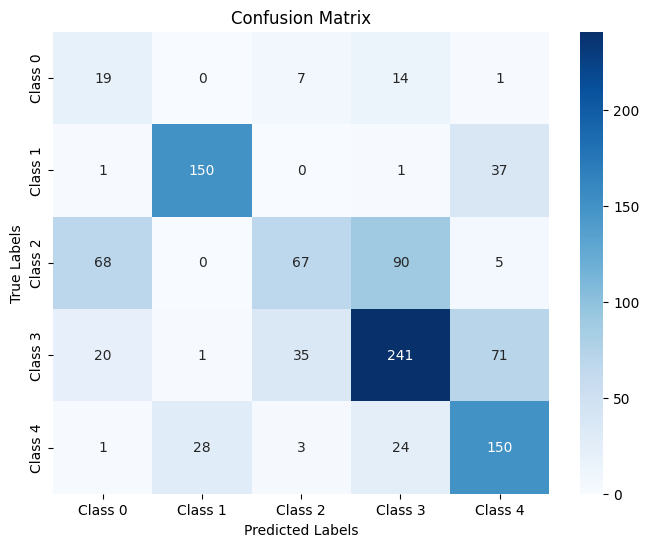

In [180]:
rf= RandomForestClassifier(random_state=1, n_estimators=150, criterion='entropy', bootstrap=False,
                          max_depth=20, max_features='sqrt', min_samples_leaf=2, min_samples_split=4,
                            warm_start=True)

rf.fit(x_df, y_df_int)

#Evaluate using normalised test data
y_pred= rf.predict(x_test_df)

# Classification Report
report = classification_report(y_test_df_int, y_pred)
print(report)

summary_score = calculate_tnr_tpr_summary(y_test_df_int, y_pred)
print(f"Summary score: {summary_score}")

# Confusion Matrix
cm= confusion_matrix(y_test_df_int, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g',
            xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4'],
            yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

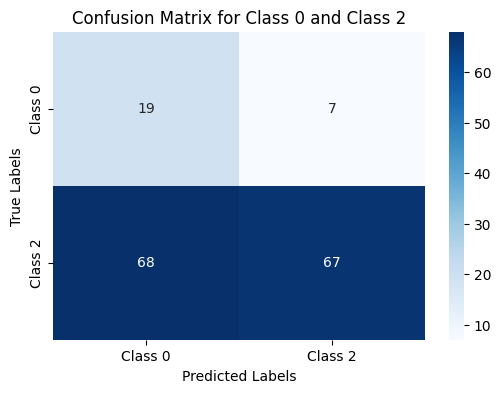

TPR_2_0 = 0.4962962962962963
TNR_2_0 = 0.7307692307692307


In [181]:
# Define the classes to keep
classes_to_keep = [0, 2]

# Extract the smaller confusion matrix
small_cm = cm[np.ix_(classes_to_keep, classes_to_keep)]

# Plot the smaller confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(small_cm, annot=True, cmap='Blues', fmt='g',
            xticklabels=['Class 0', 'Class 2'],
            yticklabels=['Class 0', 'Class 2'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Class 0 and Class 2')
plt.show()

tn, fp, fn, tp = small_cm.ravel()
tnr= tn / (tn + fp)
tpr=tp / (tp + fn)

print(f"TPR_2_0 = {tpr}")
print(f"TNR_2_0 = {tnr}")

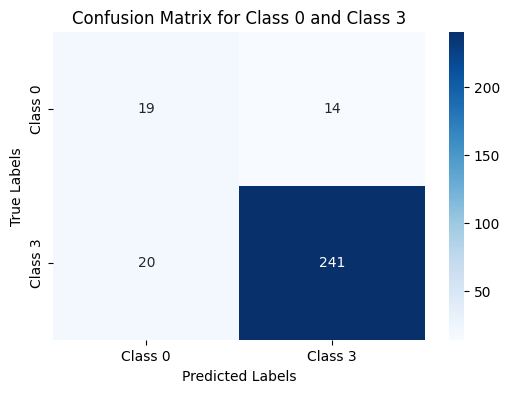

TPR_3_0 = 0.9233716475095786
TNR_3_0 = 0.5757575757575758


In [182]:
# Define the classes to keep
classes_to_keep = [0, 3]

# Extract the smaller confusion matrix
small_cm = cm[np.ix_(classes_to_keep, classes_to_keep)]

# Plot the smaller confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(small_cm, annot=True, cmap='Blues', fmt='g',
            xticklabels=['Class 0', 'Class 3'],
            yticklabels=['Class 0', 'Class 3'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Class 0 and Class 3')
plt.show()

tn, fp, fn, tp = small_cm.ravel()
tnr= tn / (tn + fp)
tpr=tp / (tp + fn)

print(f"TPR_3_0 = {tpr}")
print(f"TNR_3_0 = {tnr}")

### Normalised

              precision    recall  f1-score   support

           0       0.20      0.54      0.29        41
           1       0.84      0.79      0.81       189
           2       0.61      0.31      0.41       230
           3       0.66      0.64      0.65       368
           4       0.55      0.72      0.62       206

    accuracy                           0.61      1034
   macro avg       0.57      0.60      0.56      1034
weighted avg       0.64      0.61      0.61      1034

Summary score: 0.6896205670095484


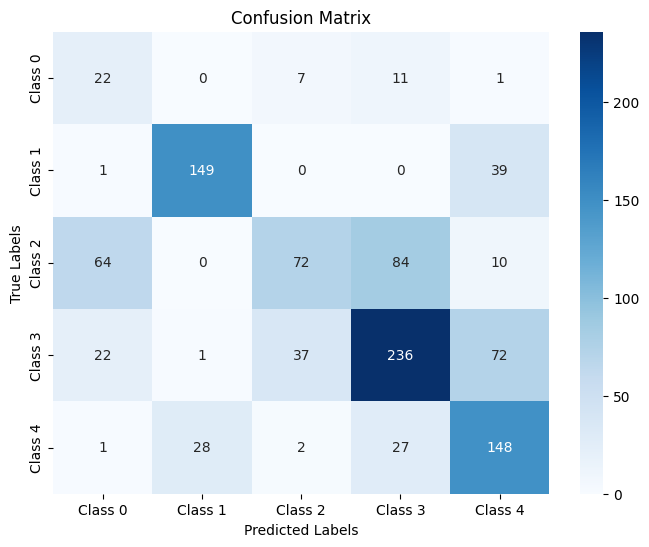

In [183]:
rf= RandomForestClassifier(random_state=1, n_estimators=150, criterion='entropy', bootstrap=False,
                          max_depth=20, max_features='sqrt', min_samples_leaf=2, min_samples_split=4,
                            warm_start=True)

rf.fit(x_df_norm_all, y_df_int)

#Evaluate using normalised test data
y_pred= rf.predict(x_test_norm_all)

# Classification Report
report = classification_report(y_test_df_int, y_pred)
print(report)

summary_score = calculate_tnr_tpr_summary(y_test_df_int, y_pred)
print(f"Summary score: {summary_score}")

# Confusion Matrix
cm= confusion_matrix(y_test_df_int, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g',
            xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4'],
            yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

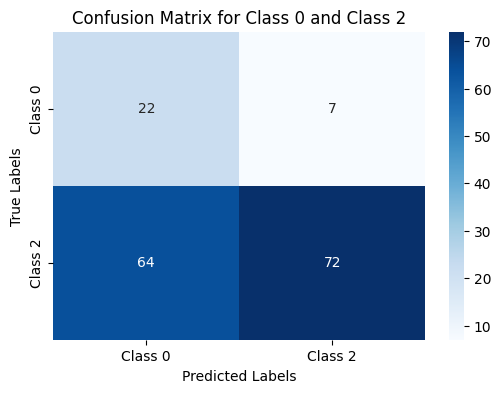

TPR_2_0 = 0.5294117647058824
TNR_2_0 = 0.7586206896551724


In [184]:
# Define the classes to keep
classes_to_keep = [0, 2]

# Extract the smaller confusion matrix
small_cm = cm[np.ix_(classes_to_keep, classes_to_keep)]

# Plot the smaller confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(small_cm, annot=True, cmap='Blues', fmt='g',
            xticklabels=['Class 0', 'Class 2'],
            yticklabels=['Class 0', 'Class 2'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Class 0 and Class 2')
plt.show()

tn, fp, fn, tp = small_cm.ravel()
tnr= tn / (tn + fp)
tpr=tp / (tp + fn)

print(f"TPR_2_0 = {tpr}")
print(f"TNR_2_0 = {tnr}")

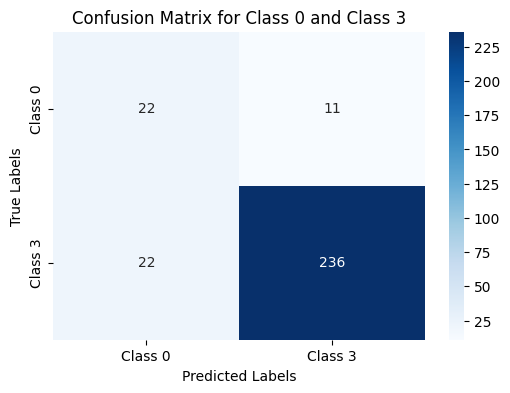

TPR_3_0 = 0.9147286821705426
TNR_3_0 = 0.6666666666666666


In [185]:
# Define the classes to keep
classes_to_keep = [0, 3]

# Extract the smaller confusion matrix
small_cm = cm[np.ix_(classes_to_keep, classes_to_keep)]

# Plot the smaller confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(small_cm, annot=True, cmap='Blues', fmt='g',
            xticklabels=['Class 0', 'Class 3'],
            yticklabels=['Class 0', 'Class 3'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Class 0 and Class 3')
plt.show()

tn, fp, fn, tp = small_cm.ravel()
tnr= tn / (tn + fp)
tpr=tp / (tp + fn)

print(f"TPR_3_0 = {tpr}")
print(f"TNR_3_0 = {tnr}")

## LOESS

In [186]:
# Normalise the LOESS variables
scaler = MinMaxScaler().set_output(transform="pandas")
x_df_norm_smooth = scaler.fit_transform(smoothed_df)

x_test_df_norm_smooth = scaler.transform(smoothed_df_t)

In [187]:
# Extract Features
x_df_norm_smooth_all = pd.concat([
    x_df_norm_smooth.iloc[:, vertical_lines_x[0]:vertical_lines_x[1]],
    x_df_norm_smooth.iloc[:, vertical_lines_x_1[0]:vertical_lines_x_1[1]],
    x_df_norm_smooth.iloc[:, vertical_lines_x_2[0]:vertical_lines_x_2[1]]
], axis=1)

x_test_df_norm_smooth_all = pd.concat([
    x_test_df_norm_smooth.iloc[:, vertical_lines_x[0]:vertical_lines_x[1]],
    x_test_df_norm_smooth.iloc[:, vertical_lines_x_1[0]:vertical_lines_x_1[1]],
    x_test_df_norm_smooth.iloc[:, vertical_lines_x_2[0]:vertical_lines_x_2[1]]
], axis=1)

              precision    recall  f1-score   support

           0       0.20      0.44      0.27        41
           1       0.82      0.77      0.79       189
           2       0.59      0.33      0.42       230
           3       0.63      0.63      0.63       368
           4       0.50      0.66      0.57       206

    accuracy                           0.59      1034
   macro avg       0.55      0.57      0.54      1034
weighted avg       0.61      0.59      0.59      1034

Summary score: 0.682563956351572


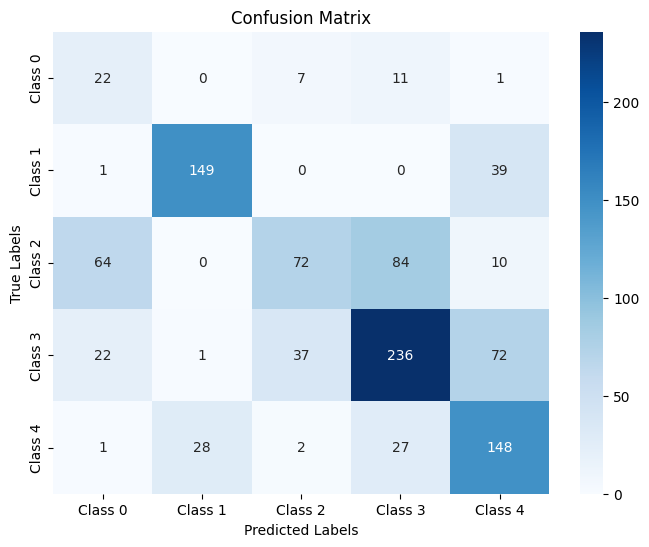

In [188]:
# Train model with normalised and smoothed train data
rf= RandomForestClassifier(random_state=1, n_estimators=150, criterion='entropy', bootstrap=False,
                          max_depth=20, max_features='sqrt', min_samples_leaf=2, min_samples_split=4,
                            warm_start=True)

rf.fit(x_df_norm_smooth_all, y_df_int)

#Evaluate using normalised and smoothed test data
y_pred= rf.predict(x_test_df_norm_smooth_all)

# Classification Report
report = classification_report(y_test_df_int, y_pred)
print(report)

summary_score = calculate_tnr_tpr_summary(y_test_df_int, y_pred)
print(f"Summary score: {summary_score}")

# Confusion Matrix
cm_loess = confusion_matrix(y_test_df_int, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g',
            xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4'],
            yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

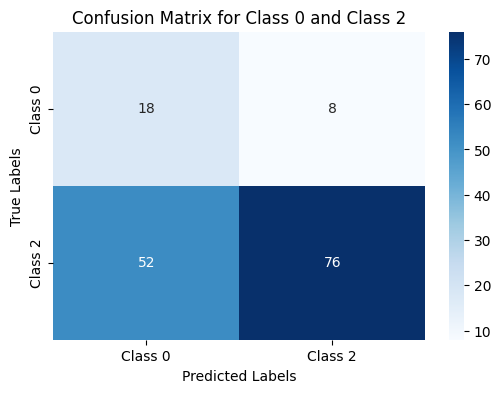

TPR_2_0 = 0.59375
TNR_2_0 = 0.6923076923076923


In [189]:
# Define the classes to keep
classes_to_keep = [0, 2]

# Extract the smaller confusion matrix
small_cm = cm_loess[np.ix_(classes_to_keep, classes_to_keep)]

# Plot the smaller confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(small_cm, annot=True, cmap='Blues', fmt='g',
            xticklabels=['Class 0', 'Class 2'],
            yticklabels=['Class 0', 'Class 2'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Class 0 and Class 2')
plt.show()

tn, fp, fn, tp = small_cm.ravel()
tnr= tn / (tn + fp)
tpr=tp / (tp + fn)

print(f"TPR_2_0 = {tpr}")
print(f"TNR_2_0 = {tnr}")

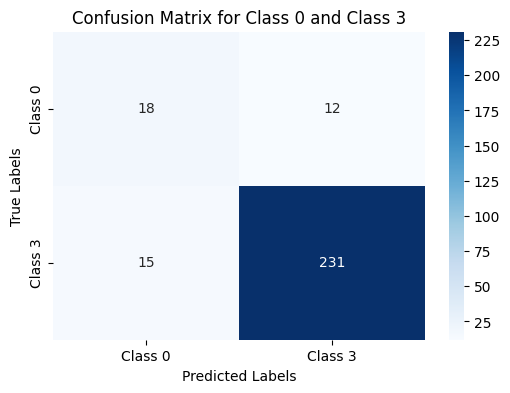

TPR_3_0 = 0.9390243902439024
TNR_3_0 = 0.6


In [190]:
# Define the classes to keep
classes_to_keep = [0, 3]

# Extract the smaller confusion matrix
small_cm = cm_loess[np.ix_(classes_to_keep, classes_to_keep)]

# Plot the smaller confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(small_cm, annot=True, cmap='Blues', fmt='g',
            xticklabels=['Class 0', 'Class 3'],
            yticklabels=['Class 0', 'Class 3'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Class 0 and Class 3')
plt.show()

tn, fp, fn, tp = small_cm.ravel()
tnr= tn / (tn + fp)
tpr=tp / (tp + fn)

print(f"TPR_3_0 = {tpr}")
print(f"TNR_3_0 = {tnr}")

## Test Data Visualisation

[]

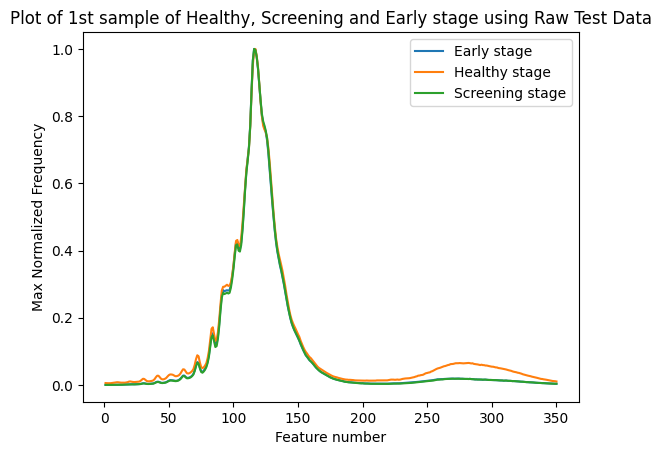

In [191]:
# Raw Test Data Visualisation
feature_columns = df_test.columns.tolist()

new_column_names = {old_col: i+1 for i, old_col in enumerate(df_test.columns[:350])}
df_test.rename(columns = new_column_names, inplace = True)
filtered_df = df_test.groupby('class_label').first()

plt.plot(filtered_df.iloc[0], label = "Early stage")
plt.plot(filtered_df.iloc[1], label = "Healthy stage")
plt.plot(filtered_df.iloc[4], label = "Screening stage")
plt.legend()
plt.title("Plot of 1st sample of Healthy, Screening and Early stage using Raw Test Data")
plt.xlabel("Feature number")
plt.ylabel("Max Normalized Frequency")
plt.plot()

[]

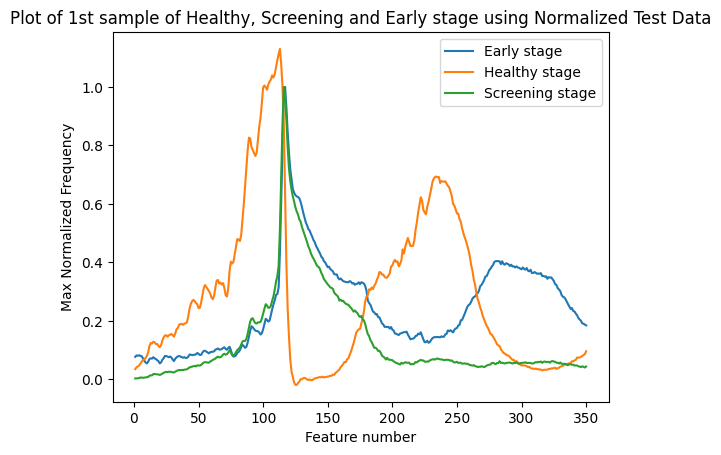

In [192]:
# Normalized Test Data Visualization
feature_columns = x_test_df_norm.columns.tolist()
label = list(range(1,351))
new_column_names = {old_col: new_col for old_col, new_col in zip(x_test_df_norm.columns, label)}
x_test_df_norm.rename(columns=new_column_names, inplace=True)

df20 = pd.concat([x_test_df_norm, y_test_df_int], axis = 1)
new_column_names = {old_col: i+1 for i, old_col in enumerate(label)}
df20.rename(columns = new_column_names, inplace = True)

filtered_df = df20.groupby('class_label').first()

plt.plot(filtered_df.iloc[0], label = "Early stage")
plt.plot(filtered_df.iloc[1], label = "Healthy stage")
plt.plot(filtered_df.iloc[4], label = "Screening stage")
plt.legend()
plt.title("Plot of 1st sample of Healthy, Screening and Early stage using Normalized Test Data")
plt.xlabel("Feature number")
plt.ylabel("Max Normalized Frequency")
plt.plot()

> The poor performance could be attributed to only using 1 sample from each class to identify the feature regions to be extracted, which is not representative of the entire dataset.